Using TensorFlow backend.


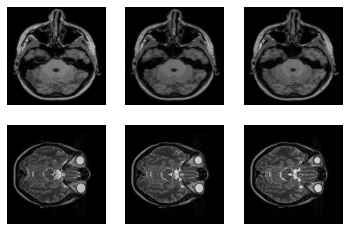

In [1]:
from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot 
import pickle

#Resizing images, if needed
SIZE_X = 256
SIZE_Y = 256
#n_classes=4 #Number of classes for segmentation

# #Capture training image info as a list
# tar_images = []

# for directory_path in glob.glob("E:/UPWORK/GAN_paper/Train/"):
#     for img_path in glob.glob(os.path.join(directory_path, "*.png")):
#         img = cv2.imread(img_path, 1)       
#         img = cv2.resize(img, (SIZE_Y, SIZE_X))
#         tar_images.append(img)
       
# #Convert list to array for machine learning processing        
# tar_images = np.array(tar_images)
# # print(len(tar_images))

# #Capture mask/label info as a list
# src_images = [] 
# for directory_path in glob.glob("E:/UPWORK/GAN_paper/Val/"):
#     for mask_path in glob.glob(os.path.join(directory_path, "*.png")):
#         mask = cv2.imread(mask_path, 1)       
#         mask = cv2.resize(mask, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)  #Otherwise ground truth changes due to interpolation
#         src_images.append(mask)
        
# #Convert list to array for machine learning processing          
# src_images = np.array(src_images)

# # print(np.unique(src_images))

file1 = open("med_slice_T1.pickle", "rb")
data1 = pickle.load(file1)
data1 = np.array(data1)

file2 = open("med_slice_T2.pickle", "rb")
data2 = pickle.load(file2)
data2 = np.array(data2)


src_images = data1[0:500]
tar_images = data2[0:500]



n_samples = 3
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(src_images[i])
# plot target image
for i in range(n_samples):
    pyplot.subplot(2, n_samples, 1 + n_samples + i)
    pyplot.axis('off')
    pyplot.imshow(tar_images[i])
pyplot.show()



In [2]:
#######################################################

from Pix2PixGAN_model import define_discriminator, define_generator, define_gan, train
# define input shape based on the loaded dataset
image_shape = src_images.shape[1:]
# define the models
d_model = define_discriminator(image_shape)
g_model = define_generator(image_shape)
# define the composite model
gan_model = define_gan(g_model, d_model, image_shape)

#Define data
# load and prepare training images
data = [src_images, tar_images]

#Preprocess data to change input range to values between -1 and 1
# This is because the generator uses tanh activation in the output layer
#And tanh ranges between -1 and 1
def preprocess_data(data):
    # load compressed arrays
    # unpack arrays
    X1, X2 = data[0], data[1]
    # scale from [0,255] to [-1,1]
    X1 = (X1 - 127.5) / 127.5
    X2 = (X2 - 127.5) / 127.5
    return [X1, X2]

dataset = preprocess_data(data)

from datetime import datetime 
start1 = datetime.now() 

train(d_model, g_model, gan_model, dataset, n_epochs=50, n_batch=1) 
#Reports parameters for each batch (total 1600) for each epoch.
#For 10 epochs we should see 16000

stop1 = datetime.now()
#Execution time of the model 
execution_time = stop1-start1
print("Execution time is: ", execution_time)

#Reports parameters for each batch (total 1096) for each epoch.
#For 10 epochs we should see 10960
g_model.save('med_images_.h5')


C:\Users\Oybek\.conda\envs\tf_GPU\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
C:\Users\Oybek\.conda\envs\tf_GPU\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>1, d1[0.345] d2[1.042] g[83.762]


C:\Users\Oybek\.conda\envs\tf_GPU\lib\site-packages\keras\engine\training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>2, d1[0.250] d2[0.855] g[78.873]
>3, d1[0.641] d2[0.558] g[78.091]
>4, d1[0.318] d2[0.456] g[78.063]
>5, d1[0.359] d2[0.435] g[77.179]
>6, d1[0.290] d2[0.351] g[68.114]
>7, d1[0.316] d2[0.290] g[69.999]
>8, d1[0.289] d2[0.397] g[68.298]
>9, d1[0.287] d2[0.242] g[59.444]
>10, d1[0.275] d2[0.252] g[64.586]
>11, d1[0.159] d2[0.150] g[61.744]
>12, d1[0.149] d2[0.089] g[58.938]
>13, d1[0.122] d2[0.103] g[58.267]
>14, d1[0.100] d2[0.112] g[49.802]
>15, d1[0.129] d2[0.110] g[47.345]
>16, d1[0.257] d2[1.032] g[51.675]
>17, d1[0.335] d2[0.118] g[50.037]
>18, d1[0.162] d2[0.068] g[47.785]
>19, d1[0.078] d2[0.063] g[45.491]
>20, d1[0.063] d2[0.088] g[37.759]
>21, d1[0.066] d2[0.056] g[39.183]
>22, d1[0.057] d2[0.037] g[38.470]
>23, d1[0.048] d2[0.030] g[38.901]
>24, d1[0.040] d2[0.136] g[33.928]
>25, d1[0.530] d2[0.450] g[30.772]
>26, d1[0.285] d2[0.114] g[28.416]
>27, d1[0.066] d2[0.178] g[31.920]
>28, d1[0.175] d2[0.054] g[27.826]
>29, d1[0.079] d2[0.049] g[26.795]
>30, d1[0.035] d2[0.202] g[2

>233, d1[0.092] d2[0.022] g[13.026]
>234, d1[0.027] d2[0.017] g[17.103]
>235, d1[0.021] d2[0.019] g[16.530]
>236, d1[0.012] d2[0.022] g[14.951]
>237, d1[0.050] d2[0.036] g[14.481]
>238, d1[0.015] d2[0.023] g[16.318]
>239, d1[0.081] d2[0.092] g[13.442]
>240, d1[0.033] d2[0.022] g[15.080]
>241, d1[0.035] d2[0.047] g[15.073]
>242, d1[0.050] d2[0.024] g[14.107]
>243, d1[0.026] d2[0.065] g[14.264]
>244, d1[0.067] d2[0.032] g[13.528]
>245, d1[0.028] d2[0.018] g[16.170]
>246, d1[0.016] d2[0.032] g[13.859]
>247, d1[0.015] d2[0.023] g[13.641]
>248, d1[0.019] d2[0.027] g[15.069]
>249, d1[0.057] d2[0.075] g[15.026]
>250, d1[0.032] d2[0.016] g[15.461]
>251, d1[0.022] d2[0.013] g[18.870]
>252, d1[0.011] d2[0.019] g[15.492]
>253, d1[0.004] d2[0.011] g[18.641]
>254, d1[0.121] d2[0.500] g[13.662]
>255, d1[0.969] d2[1.338] g[13.606]
>256, d1[0.289] d2[0.219] g[12.235]
>257, d1[0.090] d2[0.513] g[14.621]
>258, d1[0.824] d2[0.118] g[14.265]
>259, d1[0.056] d2[0.296] g[15.493]
>260, d1[0.062] d2[0.011] g[

>461, d1[0.042] d2[0.283] g[16.483]
>462, d1[0.393] d2[0.053] g[14.893]
>463, d1[0.031] d2[0.077] g[16.950]
>464, d1[0.025] d2[0.143] g[18.027]
>465, d1[0.132] d2[0.062] g[15.109]
>466, d1[0.089] d2[0.207] g[16.472]
>467, d1[0.163] d2[0.033] g[15.232]
>468, d1[0.781] d2[1.776] g[14.052]
>469, d1[0.019] d2[0.064] g[18.266]
>470, d1[0.095] d2[0.063] g[16.483]
>471, d1[0.230] d2[0.110] g[14.133]
>472, d1[0.028] d2[0.149] g[15.298]
>473, d1[0.025] d2[0.132] g[18.240]
>474, d1[0.442] d2[0.266] g[14.351]
>475, d1[0.163] d2[0.123] g[13.628]
>476, d1[0.095] d2[0.070] g[14.369]
>477, d1[0.130] d2[0.300] g[14.999]
>478, d1[0.159] d2[0.014] g[15.511]
>479, d1[0.089] d2[0.045] g[16.431]
>480, d1[0.039] d2[0.097] g[17.033]
>481, d1[0.034] d2[0.128] g[15.110]
>482, d1[0.097] d2[0.113] g[16.112]
>483, d1[0.188] d2[0.174] g[14.672]
>484, d1[0.724] d2[0.748] g[14.999]
>485, d1[0.215] d2[0.081] g[15.593]
>486, d1[0.063] d2[0.091] g[14.978]
>487, d1[0.050] d2[0.065] g[17.269]
>488, d1[0.144] d2[0.365] g[

>689, d1[0.060] d2[0.112] g[16.357]
>690, d1[0.166] d2[0.087] g[15.234]
>691, d1[0.205] d2[0.663] g[15.825]
>692, d1[0.382] d2[0.061] g[14.058]
>693, d1[0.130] d2[0.153] g[15.279]
>694, d1[0.010] d2[0.025] g[18.069]
>695, d1[0.124] d2[0.190] g[14.832]
>696, d1[0.069] d2[0.022] g[15.230]
>697, d1[0.108] d2[0.138] g[15.025]
>698, d1[0.227] d2[0.211] g[13.249]
>699, d1[0.060] d2[0.046] g[15.533]
>700, d1[0.113] d2[0.056] g[12.849]
>701, d1[0.014] d2[0.115] g[16.678]
>702, d1[0.097] d2[0.061] g[16.091]
>703, d1[0.091] d2[0.391] g[15.524]
>704, d1[0.208] d2[0.022] g[14.162]
>705, d1[0.064] d2[0.074] g[16.514]
>706, d1[0.135] d2[0.160] g[15.274]
>707, d1[0.082] d2[0.062] g[15.540]
>708, d1[0.113] d2[0.070] g[13.582]
>709, d1[0.037] d2[0.186] g[15.312]
>710, d1[0.326] d2[0.400] g[15.941]
>711, d1[0.215] d2[0.068] g[16.034]
>712, d1[0.218] d2[0.138] g[13.072]
>713, d1[0.029] d2[0.529] g[18.365]
>714, d1[0.535] d2[0.236] g[14.937]
>715, d1[0.323] d2[0.089] g[14.636]
>716, d1[0.025] d2[0.111] g[

>917, d1[0.038] d2[0.055] g[16.384]
>918, d1[0.440] d2[0.255] g[13.826]
>919, d1[0.008] d2[0.281] g[17.476]
>920, d1[0.373] d2[0.041] g[13.132]
>921, d1[0.005] d2[0.306] g[16.829]
>922, d1[0.402] d2[0.103] g[13.050]
>923, d1[0.027] d2[0.139] g[13.752]
>924, d1[0.022] d2[0.154] g[13.556]
>925, d1[0.257] d2[0.040] g[13.258]
>926, d1[0.063] d2[0.344] g[14.827]
>927, d1[0.714] d2[0.121] g[12.523]
>928, d1[0.047] d2[0.249] g[13.569]
>929, d1[0.051] d2[0.048] g[13.343]
>930, d1[0.395] d2[0.537] g[12.752]
>931, d1[0.038] d2[0.024] g[18.054]
>932, d1[0.141] d2[0.055] g[16.412]
>933, d1[0.020] d2[0.063] g[16.547]
>934, d1[0.118] d2[0.121] g[16.483]
>935, d1[0.364] d2[0.337] g[14.708]
>936, d1[0.035] d2[0.066] g[13.417]
>937, d1[0.182] d2[0.105] g[14.067]
>938, d1[0.102] d2[0.253] g[12.667]
>939, d1[0.268] d2[0.160] g[13.229]
>940, d1[0.220] d2[0.097] g[14.091]
>941, d1[0.028] d2[0.195] g[15.702]
>942, d1[0.052] d2[0.128] g[14.398]
>943, d1[0.257] d2[0.090] g[14.226]
>944, d1[0.085] d2[0.167] g[

>1141, d1[0.170] d2[0.260] g[14.093]
>1142, d1[0.135] d2[0.222] g[15.765]
>1143, d1[0.446] d2[0.460] g[15.680]
>1144, d1[0.451] d2[0.264] g[13.272]
>1145, d1[0.141] d2[0.194] g[13.236]
>1146, d1[0.078] d2[0.059] g[12.907]
>1147, d1[0.162] d2[0.067] g[11.756]
>1148, d1[0.026] d2[0.232] g[13.817]
>1149, d1[0.088] d2[0.049] g[12.276]
>1150, d1[0.055] d2[0.148] g[15.905]
>1151, d1[0.278] d2[0.179] g[14.193]
>1152, d1[0.158] d2[0.428] g[15.619]
>1153, d1[0.260] d2[0.028] g[16.825]
>1154, d1[0.061] d2[0.309] g[13.149]
>1155, d1[0.490] d2[0.051] g[12.780]
>1156, d1[0.140] d2[0.276] g[14.721]
>1157, d1[0.042] d2[0.178] g[15.957]
>1158, d1[0.529] d2[0.102] g[16.366]
>1159, d1[0.160] d2[0.275] g[14.967]
>1160, d1[0.012] d2[0.055] g[13.258]
>1161, d1[0.100] d2[0.130] g[12.909]
>1162, d1[0.061] d2[0.329] g[15.346]
>1163, d1[0.699] d2[0.390] g[12.406]
>1164, d1[0.369] d2[0.277] g[15.019]
>1165, d1[0.069] d2[0.065] g[12.963]
>1166, d1[0.015] d2[0.031] g[16.753]
>1167, d1[0.104] d2[0.058] g[14.073]
>

>1363, d1[0.245] d2[0.276] g[12.477]
>1364, d1[0.007] d2[0.197] g[14.481]
>1365, d1[0.071] d2[0.127] g[13.452]
>1366, d1[0.604] d2[0.139] g[9.433]
>1367, d1[0.018] d2[0.264] g[13.267]
>1368, d1[0.441] d2[0.262] g[11.362]
>1369, d1[0.188] d2[0.193] g[15.046]
>1370, d1[0.033] d2[0.066] g[14.033]
>1371, d1[0.099] d2[0.048] g[11.869]
>1372, d1[0.103] d2[0.072] g[12.813]
>1373, d1[0.089] d2[0.248] g[13.392]
>1374, d1[0.258] d2[0.210] g[13.930]
>1375, d1[0.012] d2[0.206] g[13.891]
>1376, d1[0.440] d2[0.224] g[13.337]
>1377, d1[0.025] d2[0.101] g[11.723]
>1378, d1[0.129] d2[0.046] g[11.918]
>1379, d1[0.068] d2[0.189] g[11.821]
>1380, d1[0.095] d2[0.103] g[11.887]
>1381, d1[0.062] d2[0.164] g[11.069]
>1382, d1[0.211] d2[0.107] g[12.816]
>1383, d1[0.134] d2[0.171] g[13.166]
>1384, d1[0.139] d2[0.389] g[15.413]
>1385, d1[0.630] d2[0.107] g[16.281]
>1386, d1[0.144] d2[0.331] g[14.053]
>1387, d1[0.087] d2[0.120] g[13.046]
>1388, d1[0.513] d2[0.203] g[12.862]
>1389, d1[0.123] d2[0.229] g[13.970]
>1

>1585, d1[0.115] d2[0.237] g[14.472]
>1586, d1[0.164] d2[0.381] g[10.378]
>1587, d1[0.084] d2[0.060] g[11.071]
>1588, d1[0.930] d2[0.152] g[8.478]
>1589, d1[0.031] d2[0.149] g[10.385]
>1590, d1[0.023] d2[0.084] g[11.297]
>1591, d1[0.104] d2[0.117] g[11.991]
>1592, d1[0.014] d2[0.091] g[13.506]
>1593, d1[0.111] d2[0.089] g[12.501]
>1594, d1[0.125] d2[0.304] g[10.567]
>1595, d1[0.277] d2[0.166] g[11.992]
>1596, d1[0.223] d2[0.242] g[11.967]
>1597, d1[0.053] d2[0.057] g[12.959]
>1598, d1[0.205] d2[0.094] g[12.745]
>1599, d1[0.068] d2[0.828] g[13.831]
>1600, d1[0.501] d2[0.096] g[11.430]
>1601, d1[0.116] d2[0.160] g[13.011]
>1602, d1[0.040] d2[0.174] g[11.940]
>1603, d1[0.170] d2[0.093] g[11.075]
>1604, d1[0.139] d2[0.186] g[10.656]
>1605, d1[0.085] d2[0.245] g[11.397]
>1606, d1[0.245] d2[0.054] g[12.660]
>1607, d1[0.025] d2[0.130] g[12.156]
>1608, d1[0.067] d2[0.170] g[11.405]
>1609, d1[0.222] d2[0.328] g[11.163]
>1610, d1[0.416] d2[0.473] g[11.908]
>1611, d1[0.136] d2[0.057] g[11.930]
>1

>1808, d1[0.055] d2[0.553] g[12.459]
>1809, d1[0.625] d2[0.079] g[10.890]
>1810, d1[0.409] d2[0.133] g[13.835]
>1811, d1[0.054] d2[0.216] g[10.196]
>1812, d1[0.041] d2[0.193] g[10.966]
>1813, d1[0.060] d2[0.055] g[10.867]
>1814, d1[0.111] d2[0.095] g[11.388]
>1815, d1[0.003] d2[0.388] g[13.133]
>1816, d1[0.671] d2[0.087] g[10.931]
>1817, d1[0.078] d2[0.137] g[10.322]
>1818, d1[0.025] d2[0.119] g[9.618]
>1819, d1[0.107] d2[0.188] g[10.469]
>1820, d1[0.026] d2[0.037] g[14.000]
>1821, d1[0.106] d2[0.101] g[11.270]
>1822, d1[0.020] d2[0.223] g[11.368]
>1823, d1[0.295] d2[0.137] g[9.132]
>1824, d1[0.036] d2[0.115] g[11.732]
>1825, d1[0.150] d2[0.061] g[11.908]
>1826, d1[0.035] d2[0.354] g[12.815]
>1827, d1[0.312] d2[0.101] g[11.422]
>1828, d1[0.095] d2[0.327] g[12.634]
>1829, d1[0.666] d2[0.152] g[10.892]
>1830, d1[0.008] d2[0.172] g[14.483]
>1831, d1[0.194] d2[0.104] g[9.788]
>1832, d1[0.220] d2[0.311] g[10.071]
>1833, d1[0.046] d2[0.061] g[12.496]
>1834, d1[0.153] d2[0.198] g[10.038]
>183

>2031, d1[0.366] d2[0.430] g[9.413]
>2032, d1[0.017] d2[0.049] g[12.538]
>2033, d1[0.023] d2[0.057] g[12.310]
>2034, d1[0.096] d2[0.068] g[12.645]
>2035, d1[0.455] d2[0.675] g[10.295]
>2036, d1[0.038] d2[0.050] g[11.884]
>2037, d1[0.284] d2[0.142] g[8.331]
>2038, d1[0.148] d2[0.189] g[11.249]
>2039, d1[0.104] d2[0.822] g[12.547]
>2040, d1[1.116] d2[0.161] g[9.623]
>2041, d1[0.401] d2[0.364] g[9.307]
>2042, d1[0.293] d2[0.411] g[10.792]
>2043, d1[0.057] d2[0.111] g[13.399]
>2044, d1[0.179] d2[0.099] g[10.676]
>2045, d1[0.060] d2[0.189] g[8.366]
>2046, d1[0.008] d2[0.108] g[13.002]
>2047, d1[0.077] d2[0.051] g[11.144]
>2048, d1[0.048] d2[0.050] g[13.063]
>2049, d1[0.048] d2[0.103] g[10.697]
>2050, d1[0.180] d2[0.192] g[9.630]
>2051, d1[0.014] d2[0.101] g[11.102]
>2052, d1[0.271] d2[0.405] g[13.157]
>2053, d1[0.180] d2[0.109] g[12.103]
>2054, d1[0.060] d2[0.137] g[10.631]
>2055, d1[0.395] d2[0.322] g[9.674]
>2056, d1[0.067] d2[0.220] g[11.779]
>2057, d1[0.095] d2[0.037] g[11.997]
>2058, d

>2255, d1[0.044] d2[0.079] g[10.618]
>2256, d1[0.036] d2[0.256] g[11.003]
>2257, d1[0.426] d2[0.299] g[8.893]
>2258, d1[0.394] d2[0.427] g[9.701]
>2259, d1[0.417] d2[0.101] g[8.551]
>2260, d1[0.020] d2[0.211] g[11.722]
>2261, d1[0.056] d2[0.055] g[13.811]
>2262, d1[0.080] d2[0.093] g[11.336]
>2263, d1[0.251] d2[0.113] g[10.623]
>2264, d1[0.015] d2[0.313] g[9.761]
>2265, d1[0.090] d2[0.097] g[9.413]
>2266, d1[0.329] d2[0.140] g[9.211]
>2267, d1[0.066] d2[0.321] g[13.168]
>2268, d1[0.162] d2[0.163] g[12.909]
>2269, d1[0.473] d2[0.151] g[9.970]
>2270, d1[0.052] d2[0.314] g[11.317]
>2271, d1[0.045] d2[0.099] g[9.009]
>2272, d1[0.499] d2[0.539] g[11.221]
>2273, d1[0.179] d2[0.123] g[11.251]
>2274, d1[0.299] d2[0.290] g[8.924]
>2275, d1[0.098] d2[0.133] g[8.654]
>2276, d1[0.457] d2[0.383] g[8.265]
>2277, d1[0.129] d2[0.163] g[10.940]
>2278, d1[0.184] d2[0.261] g[7.953]
>2279, d1[0.256] d2[0.290] g[9.299]
>2280, d1[0.379] d2[0.182] g[7.728]
>2281, d1[0.064] d2[0.159] g[9.418]
>2282, d1[0.026]

>2480, d1[0.191] d2[0.221] g[11.788]
>2481, d1[0.208] d2[0.479] g[10.296]
>2482, d1[0.095] d2[0.050] g[13.906]
>2483, d1[0.222] d2[0.105] g[7.968]
>2484, d1[0.061] d2[0.152] g[9.783]
>2485, d1[0.083] d2[0.077] g[10.832]
>2486, d1[0.034] d2[0.200] g[9.661]
>2487, d1[0.085] d2[0.074] g[10.205]
>2488, d1[0.084] d2[0.143] g[10.312]
>2489, d1[0.238] d2[0.378] g[9.918]
>2490, d1[0.388] d2[0.153] g[7.377]
>2491, d1[0.036] d2[0.401] g[9.303]
>2492, d1[0.235] d2[0.100] g[8.858]
>2493, d1[0.242] d2[0.155] g[8.801]
>2494, d1[0.028] d2[0.110] g[9.826]
>2495, d1[0.063] d2[0.050] g[15.547]
>2496, d1[0.131] d2[0.335] g[9.446]
>2497, d1[0.367] d2[0.068] g[8.906]
>2498, d1[0.017] d2[0.538] g[9.601]
>2499, d1[0.138] d2[0.099] g[9.997]
>2500, d1[0.176] d2[0.192] g[11.317]
>2501, d1[0.560] d2[0.151] g[11.014]
>2502, d1[0.124] d2[0.581] g[12.850]
>2503, d1[0.461] d2[0.173] g[8.740]
>2504, d1[0.409] d2[0.155] g[9.421]
>2505, d1[0.035] d2[0.380] g[9.966]
>2506, d1[0.153] d2[0.074] g[9.499]
>2507, d1[0.107] d

>2706, d1[0.038] d2[0.261] g[8.982]
>2707, d1[0.232] d2[0.282] g[8.530]
>2708, d1[0.313] d2[0.235] g[9.235]
>2709, d1[0.132] d2[0.097] g[11.220]
>2710, d1[0.120] d2[0.235] g[9.280]
>2711, d1[0.247] d2[0.115] g[8.405]
>2712, d1[0.037] d2[0.221] g[11.254]
>2713, d1[0.093] d2[0.101] g[11.984]
>2714, d1[0.831] d2[0.262] g[8.269]
>2715, d1[0.102] d2[0.196] g[10.558]
>2716, d1[0.131] d2[0.513] g[9.301]
>2717, d1[0.258] d2[0.078] g[11.240]
>2718, d1[0.791] d2[0.327] g[9.125]
>2719, d1[0.163] d2[0.228] g[8.924]
>2720, d1[0.182] d2[0.310] g[8.955]
>2721, d1[0.089] d2[0.111] g[9.588]
>2722, d1[0.331] d2[0.188] g[7.978]
>2723, d1[0.020] d2[0.353] g[9.864]
>2724, d1[0.543] d2[0.139] g[7.796]
>2725, d1[0.188] d2[0.264] g[8.392]
>2726, d1[0.106] d2[0.095] g[9.111]
>2727, d1[0.086] d2[0.169] g[9.152]
>2728, d1[0.240] d2[0.190] g[11.499]
>2729, d1[0.087] d2[0.089] g[13.435]
>2730, d1[0.088] d2[0.540] g[8.655]
>2731, d1[0.669] d2[0.125] g[9.952]
>2732, d1[0.065] d2[0.239] g[10.727]
>2733, d1[0.342] d2[

>2932, d1[0.839] d2[0.253] g[7.203]
>2933, d1[0.086] d2[0.127] g[12.553]
>2934, d1[0.067] d2[0.173] g[10.422]
>2935, d1[0.479] d2[0.228] g[7.711]
>2936, d1[0.059] d2[0.201] g[9.363]
>2937, d1[0.247] d2[0.231] g[9.833]
>2938, d1[0.095] d2[0.064] g[11.534]
>2939, d1[0.040] d2[0.213] g[10.553]
>2940, d1[0.271] d2[0.307] g[7.675]
>2941, d1[0.326] d2[0.187] g[10.330]
>2942, d1[0.087] d2[0.216] g[10.053]
>2943, d1[0.115] d2[0.165] g[8.040]
>2944, d1[0.498] d2[0.242] g[8.459]
>2945, d1[0.045] d2[0.253] g[8.471]
>2946, d1[0.110] d2[0.102] g[12.140]
>2947, d1[0.182] d2[0.129] g[8.918]
>2948, d1[0.289] d2[0.286] g[7.640]
>2949, d1[0.158] d2[0.592] g[8.240]
>2950, d1[0.095] d2[0.092] g[9.506]
>2951, d1[0.926] d2[0.128] g[7.179]
>2952, d1[0.219] d2[0.299] g[12.012]
>2953, d1[0.135] d2[0.350] g[8.873]
>2954, d1[0.146] d2[0.108] g[9.319]
>2955, d1[0.066] d2[0.102] g[12.155]
>2956, d1[0.086] d2[0.105] g[9.365]
>2957, d1[0.210] d2[0.215] g[8.963]
>2958, d1[0.162] d2[0.188] g[8.047]
>2959, d1[0.051] d2

>3159, d1[0.071] d2[0.342] g[9.135]
>3160, d1[0.292] d2[0.153] g[9.433]
>3161, d1[0.299] d2[0.197] g[9.902]
>3162, d1[0.236] d2[0.498] g[8.139]
>3163, d1[0.365] d2[0.130] g[8.818]
>3164, d1[0.079] d2[0.333] g[11.078]
>3165, d1[0.269] d2[0.189] g[9.880]
>3166, d1[0.224] d2[0.197] g[6.955]
>3167, d1[0.121] d2[0.202] g[8.968]
>3168, d1[0.253] d2[0.323] g[7.795]
>3169, d1[0.270] d2[0.227] g[7.597]
>3170, d1[0.368] d2[0.144] g[9.690]
>3171, d1[0.028] d2[0.521] g[8.890]
>3172, d1[0.284] d2[0.125] g[9.019]
>3173, d1[0.332] d2[0.211] g[6.491]
>3174, d1[0.100] d2[0.078] g[8.920]
>3175, d1[0.236] d2[0.289] g[8.732]
>3176, d1[0.109] d2[0.191] g[8.620]
>3177, d1[0.219] d2[0.352] g[7.140]
>3178, d1[0.207] d2[0.185] g[7.235]
>3179, d1[0.066] d2[0.288] g[8.388]
>3180, d1[0.363] d2[0.195] g[8.502]
>3181, d1[0.240] d2[0.417] g[9.182]
>3182, d1[0.287] d2[0.189] g[8.948]
>3183, d1[0.421] d2[0.254] g[8.326]
>3184, d1[0.260] d2[0.389] g[6.979]
>3185, d1[0.328] d2[0.235] g[7.315]
>3186, d1[0.259] d2[0.279] 

>3386, d1[0.445] d2[0.433] g[7.835]
>3387, d1[0.147] d2[0.200] g[9.792]
>3388, d1[0.244] d2[0.194] g[8.880]
>3389, d1[0.272] d2[0.384] g[8.839]
>3390, d1[0.267] d2[0.264] g[7.523]
>3391, d1[0.074] d2[0.177] g[10.219]
>3392, d1[0.246] d2[0.183] g[8.970]
>3393, d1[0.488] d2[0.361] g[9.334]
>3394, d1[0.189] d2[0.466] g[7.775]
>3395, d1[0.335] d2[0.206] g[7.992]
>3396, d1[0.472] d2[0.207] g[8.711]
>3397, d1[0.173] d2[0.396] g[7.244]
>3398, d1[0.128] d2[0.147] g[9.361]
>3399, d1[0.140] d2[0.251] g[9.469]
>3400, d1[0.165] d2[0.147] g[7.898]
>3401, d1[0.238] d2[0.247] g[8.569]
>3402, d1[0.209] d2[0.234] g[8.049]
>3403, d1[0.307] d2[0.270] g[6.491]
>3404, d1[0.397] d2[0.527] g[7.594]
>3405, d1[0.090] d2[0.180] g[8.543]
>3406, d1[0.164] d2[0.180] g[10.853]
>3407, d1[0.396] d2[0.235] g[8.628]
>3408, d1[0.114] d2[0.252] g[8.244]
>3409, d1[0.445] d2[0.226] g[7.170]
>3410, d1[0.349] d2[0.318] g[7.398]
>3411, d1[0.115] d2[0.254] g[7.216]
>3412, d1[0.166] d2[0.151] g[9.937]
>3413, d1[0.288] d2[0.332]

>3614, d1[0.148] d2[0.168] g[7.893]
>3615, d1[0.168] d2[0.338] g[8.965]
>3616, d1[0.280] d2[0.222] g[8.172]
>3617, d1[0.115] d2[0.271] g[7.057]
>3618, d1[0.394] d2[0.152] g[8.149]
>3619, d1[0.187] d2[0.272] g[8.970]
>3620, d1[0.178] d2[0.207] g[7.379]
>3621, d1[0.087] d2[0.192] g[8.641]
>3622, d1[0.293] d2[0.221] g[7.782]
>3623, d1[0.306] d2[0.241] g[8.164]
>3624, d1[0.066] d2[0.279] g[8.779]
>3625, d1[0.223] d2[0.183] g[7.762]
>3626, d1[0.158] d2[0.356] g[7.262]
>3627, d1[0.227] d2[0.189] g[9.112]
>3628, d1[0.556] d2[0.256] g[6.840]
>3629, d1[0.361] d2[0.311] g[6.858]
>3630, d1[0.161] d2[0.339] g[8.956]
>3631, d1[0.504] d2[0.223] g[8.449]
>3632, d1[0.076] d2[0.273] g[10.210]
>3633, d1[0.373] d2[0.156] g[8.993]
>3634, d1[0.186] d2[0.247] g[6.516]
>3635, d1[0.167] d2[0.374] g[8.090]
>3636, d1[0.304] d2[0.259] g[6.684]
>3637, d1[0.109] d2[0.219] g[10.255]
>3638, d1[0.235] d2[0.284] g[7.321]
>3639, d1[0.415] d2[0.214] g[6.836]
>3640, d1[0.118] d2[0.230] g[8.108]
>3641, d1[0.122] d2[0.329]

>3842, d1[0.349] d2[0.363] g[6.424]
>3843, d1[0.090] d2[0.193] g[8.659]
>3844, d1[0.147] d2[0.173] g[7.992]
>3845, d1[0.109] d2[0.448] g[6.607]
>3846, d1[0.409] d2[0.155] g[7.435]
>3847, d1[0.380] d2[0.225] g[6.379]
>3848, d1[0.167] d2[0.336] g[7.770]
>3849, d1[0.215] d2[0.201] g[8.153]
>3850, d1[0.232] d2[0.496] g[6.805]
>3851, d1[0.272] d2[0.340] g[7.829]
>3852, d1[0.472] d2[0.193] g[6.164]
>3853, d1[0.170] d2[0.291] g[8.448]
>3854, d1[0.240] d2[0.225] g[8.208]
>3855, d1[0.272] d2[0.483] g[6.281]
>3856, d1[0.532] d2[0.262] g[6.291]
>3857, d1[0.233] d2[0.205] g[7.410]
>3858, d1[0.068] d2[0.219] g[7.064]
>3859, d1[0.330] d2[0.357] g[6.590]
>3860, d1[0.115] d2[0.145] g[8.906]
>3861, d1[0.214] d2[0.353] g[7.423]
>3862, d1[0.278] d2[0.279] g[8.089]
>3863, d1[0.349] d2[0.283] g[7.745]
>3864, d1[0.353] d2[0.323] g[6.850]
>3865, d1[0.261] d2[0.195] g[7.556]
>3866, d1[0.114] d2[0.238] g[7.911]
>3867, d1[0.175] d2[0.175] g[8.522]
>3868, d1[0.161] d2[0.395] g[6.670]
>3869, d1[0.171] d2[0.190] g

>4070, d1[0.156] d2[0.165] g[11.664]
>4071, d1[0.404] d2[0.204] g[6.591]
>4072, d1[0.374] d2[0.237] g[7.889]
>4073, d1[0.162] d2[0.184] g[16.109]
>4074, d1[0.085] d2[0.345] g[7.568]
>4075, d1[0.161] d2[0.198] g[6.100]
>4076, d1[0.068] d2[0.223] g[9.421]
>4077, d1[0.265] d2[0.177] g[7.712]
>4078, d1[0.065] d2[0.099] g[17.526]
>4079, d1[0.185] d2[0.388] g[7.546]
>4080, d1[0.330] d2[0.156] g[7.464]
>4081, d1[0.249] d2[0.376] g[7.563]
>4082, d1[0.144] d2[0.178] g[7.381]
>4083, d1[0.166] d2[0.328] g[7.908]
>4084, d1[0.338] d2[0.200] g[6.289]
>4085, d1[0.057] d2[0.098] g[11.947]
>4086, d1[0.139] d2[0.267] g[8.037]
>4087, d1[0.192] d2[0.104] g[8.156]
>4088, d1[0.236] d2[0.333] g[6.679]
>4089, d1[0.062] d2[0.255] g[8.545]
>4090, d1[0.149] d2[0.128] g[8.962]
>4091, d1[0.298] d2[0.112] g[10.161]
>4092, d1[0.265] d2[0.465] g[7.204]
>4093, d1[0.124] d2[0.144] g[7.609]
>4094, d1[0.157] d2[0.218] g[7.442]
>4095, d1[0.251] d2[0.209] g[7.268]
>4096, d1[0.060] d2[0.347] g[7.195]
>4097, d1[0.431] d2[0.1

>4298, d1[0.469] d2[0.175] g[6.638]
>4299, d1[0.226] d2[0.360] g[8.753]
>4300, d1[0.041] d2[0.101] g[9.359]
>4301, d1[0.735] d2[0.210] g[6.886]
>4302, d1[0.092] d2[0.752] g[6.968]
>4303, d1[0.164] d2[0.122] g[8.549]
>4304, d1[0.449] d2[0.152] g[6.946]
>4305, d1[0.145] d2[0.505] g[7.500]
>4306, d1[0.065] d2[0.161] g[8.006]
>4307, d1[0.310] d2[0.171] g[7.381]
>4308, d1[0.239] d2[0.395] g[6.645]
>4309, d1[0.098] d2[0.098] g[8.882]
>4310, d1[0.335] d2[0.132] g[6.512]
>4311, d1[0.107] d2[0.206] g[7.320]
>4312, d1[0.050] d2[0.105] g[9.767]
>4313, d1[0.380] d2[0.162] g[6.537]
>4314, d1[0.044] d2[0.122] g[11.590]
>4315, d1[0.092] d2[0.210] g[6.946]
>4316, d1[0.127] d2[0.078] g[7.349]
>4317, d1[0.158] d2[0.177] g[6.127]
>4318, d1[0.041] d2[0.198] g[7.793]
>4319, d1[0.223] d2[0.321] g[6.890]
>4320, d1[0.459] d2[0.055] g[8.043]
>4321, d1[0.306] d2[0.204] g[7.777]
>4322, d1[0.071] d2[0.991] g[6.374]
>4323, d1[0.139] d2[0.164] g[7.096]
>4324, d1[0.328] d2[0.242] g[7.135]
>4325, d1[0.379] d2[0.210] 

>4526, d1[0.258] d2[0.160] g[7.358]
>4527, d1[0.406] d2[0.119] g[8.006]
>4528, d1[0.023] d2[0.156] g[6.991]
>4529, d1[0.054] d2[0.622] g[7.361]
>4530, d1[1.023] d2[0.438] g[6.595]
>4531, d1[0.455] d2[0.434] g[4.617]
>4532, d1[0.412] d2[0.403] g[6.539]
>4533, d1[0.371] d2[0.377] g[5.937]
>4534, d1[0.349] d2[0.443] g[5.458]
>4535, d1[0.386] d2[0.400] g[6.365]
>4536, d1[0.366] d2[0.377] g[6.503]
>4537, d1[0.373] d2[0.405] g[7.029]
>4538, d1[0.378] d2[0.355] g[6.095]
>4539, d1[0.360] d2[0.362] g[5.582]
>4540, d1[0.351] d2[0.385] g[5.830]
>4541, d1[0.367] d2[0.386] g[5.646]
>4542, d1[0.367] d2[0.395] g[5.244]
>4543, d1[0.341] d2[0.399] g[5.187]
>4544, d1[0.408] d2[0.368] g[4.378]
>4545, d1[0.369] d2[0.365] g[5.291]
>4546, d1[0.316] d2[0.355] g[7.234]
>4547, d1[0.375] d2[0.352] g[10.337]
>4548, d1[0.279] d2[0.353] g[10.393]
>4549, d1[0.279] d2[0.391] g[6.511]
>4550, d1[0.328] d2[0.361] g[5.565]
>4551, d1[0.298] d2[0.375] g[6.075]
>4552, d1[0.313] d2[0.335] g[6.455]
>4553, d1[0.366] d2[0.350]

>4754, d1[0.111] d2[0.296] g[6.608]
>4755, d1[0.188] d2[0.112] g[6.701]
>4756, d1[0.290] d2[0.327] g[7.004]
>4757, d1[0.033] d2[0.107] g[6.915]
>4758, d1[0.158] d2[0.728] g[6.666]
>4759, d1[0.111] d2[0.106] g[7.350]
>4760, d1[0.687] d2[0.134] g[6.472]
>4761, d1[0.084] d2[0.181] g[7.730]
>4762, d1[0.094] d2[0.227] g[15.596]
>4763, d1[0.304] d2[0.262] g[6.932]
>4764, d1[0.094] d2[0.142] g[7.070]
>4765, d1[0.049] d2[0.133] g[8.121]
>4766, d1[0.061] d2[0.103] g[8.106]
>4767, d1[0.368] d2[0.329] g[5.879]
>4768, d1[0.090] d2[0.181] g[7.173]
>4769, d1[0.192] d2[0.112] g[6.221]
>4770, d1[0.174] d2[0.334] g[7.215]
>4771, d1[0.153] d2[0.087] g[7.189]
>4772, d1[0.094] d2[0.149] g[7.979]
>4773, d1[0.184] d2[0.396] g[7.417]
>4774, d1[0.216] d2[0.157] g[7.282]
>4775, d1[0.399] d2[0.072] g[8.049]
>4776, d1[0.100] d2[0.069] g[7.363]
>4777, d1[0.027] d2[0.096] g[12.603]
>4778, d1[0.058] d2[0.354] g[6.694]
>4779, d1[0.117] d2[0.115] g[7.427]
>4780, d1[0.092] d2[0.122] g[6.454]
>4781, d1[0.054] d2[0.330]

>4982, d1[0.076] d2[0.174] g[8.502]
>4983, d1[0.362] d2[0.635] g[6.483]
>4984, d1[0.240] d2[0.108] g[7.727]
>4985, d1[0.334] d2[0.281] g[6.039]
>4986, d1[0.180] d2[0.098] g[5.804]
>4987, d1[0.043] d2[0.419] g[9.202]
>4988, d1[0.380] d2[0.343] g[8.124]
>4989, d1[0.227] d2[0.116] g[8.991]
>4990, d1[0.471] d2[0.213] g[6.770]
>4991, d1[0.185] d2[0.235] g[10.198]
>4992, d1[0.108] d2[0.371] g[7.067]
>4993, d1[0.176] d2[0.117] g[6.832]
>4994, d1[0.149] d2[0.114] g[6.828]
>4995, d1[0.059] d2[0.471] g[7.304]
>4996, d1[0.312] d2[0.184] g[7.194]
>4997, d1[0.313] d2[0.109] g[6.464]
>4998, d1[0.100] d2[0.343] g[6.955]
>4999, d1[0.623] d2[0.164] g[7.067]
>5000, d1[0.177] d2[0.137] g[6.958]
>Saved: plot_005000.png and model_005000.h5
>5001, d1[0.065] d2[0.195] g[7.363]
>5002, d1[0.099] d2[0.371] g[7.143]
>5003, d1[0.314] d2[0.156] g[7.590]
>5004, d1[0.194] d2[0.294] g[6.662]
>5005, d1[0.236] d2[0.069] g[9.697]
>5006, d1[0.334] d2[0.537] g[7.088]
>5007, d1[0.096] d2[0.236] g[6.549]
>5008, d1[0.604] d2

>5209, d1[0.159] d2[0.180] g[9.732]
>5210, d1[0.104] d2[0.228] g[8.004]
>5211, d1[0.308] d2[0.257] g[5.824]
>5212, d1[0.516] d2[0.267] g[6.058]
>5213, d1[0.363] d2[0.534] g[5.953]
>5214, d1[0.172] d2[0.309] g[7.055]
>5215, d1[0.585] d2[0.197] g[7.116]
>5216, d1[0.243] d2[0.267] g[6.368]
>5217, d1[0.201] d2[0.485] g[5.753]
>5218, d1[0.119] d2[0.228] g[7.103]
>5219, d1[0.362] d2[0.194] g[6.474]
>5220, d1[0.485] d2[0.318] g[5.962]
>5221, d1[0.142] d2[0.099] g[7.324]
>5222, d1[0.127] d2[0.315] g[6.407]
>5223, d1[0.111] d2[0.241] g[6.031]
>5224, d1[0.113] d2[0.233] g[8.069]
>5225, d1[0.465] d2[0.165] g[6.360]
>5226, d1[0.416] d2[0.389] g[6.473]
>5227, d1[0.142] d2[0.114] g[6.482]
>5228, d1[0.057] d2[0.238] g[7.199]
>5229, d1[0.168] d2[0.199] g[6.408]
>5230, d1[0.373] d2[0.233] g[6.377]
>5231, d1[0.461] d2[0.327] g[5.326]
>5232, d1[0.054] d2[0.105] g[11.678]
>5233, d1[0.136] d2[0.135] g[8.236]
>5234, d1[0.061] d2[0.428] g[7.209]
>5235, d1[0.205] d2[0.082] g[12.419]
>5236, d1[0.276] d2[0.298]

>5437, d1[0.118] d2[0.162] g[7.576]
>5438, d1[0.115] d2[0.306] g[6.601]
>5439, d1[0.332] d2[0.144] g[7.054]
>5440, d1[0.119] d2[0.163] g[6.332]
>5441, d1[0.056] d2[0.196] g[8.236]
>5442, d1[0.332] d2[0.417] g[7.017]
>5443, d1[0.310] d2[0.293] g[8.380]
>5444, d1[0.126] d2[0.084] g[7.156]
>5445, d1[0.413] d2[0.141] g[6.186]
>5446, d1[0.050] d2[0.773] g[6.538]
>5447, d1[0.322] d2[0.082] g[6.295]
>5448, d1[0.167] d2[0.172] g[6.852]
>5449, d1[0.184] d2[0.172] g[6.193]
>5450, d1[0.115] d2[0.247] g[6.626]
>5451, d1[0.194] d2[0.088] g[7.842]
>5452, d1[0.124] d2[0.083] g[6.656]
>5453, d1[0.067] d2[0.082] g[7.619]
>5454, d1[0.032] d2[0.675] g[6.409]
>5455, d1[0.152] d2[0.106] g[7.412]
>5456, d1[0.687] d2[0.134] g[7.012]
>5457, d1[0.073] d2[0.343] g[8.434]
>5458, d1[0.188] d2[0.109] g[7.496]
>5459, d1[0.357] d2[0.442] g[5.499]
>5460, d1[0.419] d2[0.261] g[5.480]
>5461, d1[0.060] d2[0.386] g[7.898]
>5462, d1[0.837] d2[0.157] g[6.125]
>5463, d1[0.402] d2[0.377] g[5.739]
>5464, d1[0.222] d2[0.332] g

>5665, d1[0.135] d2[0.107] g[7.550]
>5666, d1[0.349] d2[0.288] g[6.722]
>5667, d1[0.218] d2[0.112] g[6.496]
>5668, d1[0.105] d2[0.278] g[8.311]
>5669, d1[0.621] d2[0.369] g[5.873]
>5670, d1[0.096] d2[0.309] g[6.581]
>5671, d1[0.308] d2[0.086] g[6.277]
>5672, d1[0.470] d2[0.632] g[6.192]
>5673, d1[0.118] d2[0.537] g[6.185]
>5674, d1[0.459] d2[0.072] g[8.310]
>5675, d1[0.342] d2[0.084] g[6.986]
>5676, d1[0.143] d2[0.106] g[6.060]
>5677, d1[0.031] d2[0.080] g[8.397]
>5678, d1[0.054] d2[0.265] g[6.578]
>5679, d1[0.121] d2[0.081] g[7.942]
>5680, d1[0.378] d2[0.390] g[5.836]
>5681, d1[0.159] d2[0.255] g[6.342]
>5682, d1[0.141] d2[0.303] g[7.444]
>5683, d1[0.118] d2[0.192] g[6.503]
>5684, d1[0.371] d2[0.240] g[5.681]
>5685, d1[0.093] d2[0.412] g[6.581]
>5686, d1[0.680] d2[0.222] g[6.934]
>5687, d1[0.201] d2[0.216] g[6.817]
>5688, d1[0.321] d2[0.519] g[6.667]
>5689, d1[0.260] d2[0.286] g[6.020]
>5690, d1[0.506] d2[0.226] g[5.145]
>5691, d1[0.350] d2[0.524] g[5.331]
>5692, d1[0.063] d2[0.137] g

>5893, d1[0.196] d2[0.094] g[6.403]
>5894, d1[0.177] d2[0.132] g[6.100]
>5895, d1[0.038] d2[0.161] g[7.378]
>5896, d1[0.105] d2[0.483] g[6.486]
>5897, d1[0.131] d2[0.126] g[6.193]
>5898, d1[0.066] d2[0.296] g[8.264]
>5899, d1[0.657] d2[0.224] g[6.462]
>5900, d1[0.138] d2[0.167] g[11.842]
>5901, d1[0.501] d2[0.377] g[5.849]
>5902, d1[0.427] d2[0.306] g[6.031]
>5903, d1[0.143] d2[0.354] g[5.516]
>5904, d1[0.087] d2[0.211] g[7.107]
>5905, d1[0.480] d2[0.094] g[6.885]
>5906, d1[0.092] d2[0.389] g[6.299]
>5907, d1[0.187] d2[0.178] g[6.316]
>5908, d1[0.134] d2[0.342] g[6.014]
>5909, d1[0.171] d2[0.144] g[6.358]
>5910, d1[0.197] d2[0.158] g[6.002]
>5911, d1[0.338] d2[0.419] g[6.106]
>5912, d1[0.231] d2[0.220] g[5.728]
>5913, d1[0.147] d2[0.347] g[7.373]
>5914, d1[0.397] d2[0.102] g[6.395]
>5915, d1[0.121] d2[0.132] g[7.579]
>5916, d1[0.060] d2[0.222] g[7.542]
>5917, d1[0.162] d2[0.091] g[6.317]
>5918, d1[0.172] d2[0.294] g[7.115]
>5919, d1[0.077] d2[0.082] g[6.984]
>5920, d1[0.280] d2[0.227] 

>6121, d1[0.090] d2[0.373] g[7.945]
>6122, d1[0.345] d2[0.111] g[6.421]
>6123, d1[0.206] d2[0.072] g[11.378]
>6124, d1[0.100] d2[0.088] g[6.718]
>6125, d1[0.056] d2[0.257] g[7.753]
>6126, d1[0.071] d2[0.132] g[7.512]
>6127, d1[0.175] d2[0.124] g[7.234]
>6128, d1[0.134] d2[0.301] g[7.528]
>6129, d1[0.190] d2[0.098] g[6.549]
>6130, d1[0.152] d2[0.218] g[5.818]
>6131, d1[0.050] d2[0.163] g[7.185]
>6132, d1[0.267] d2[0.228] g[6.613]
>6133, d1[0.312] d2[0.317] g[6.278]
>6134, d1[0.312] d2[0.083] g[5.938]
>6135, d1[0.058] d2[0.245] g[6.491]
>6136, d1[0.107] d2[0.140] g[6.129]
>6137, d1[0.052] d2[0.123] g[8.457]
>6138, d1[0.063] d2[0.071] g[8.075]
>6139, d1[0.170] d2[0.504] g[6.125]
>6140, d1[0.312] d2[0.216] g[6.720]
>6141, d1[0.588] d2[0.144] g[5.591]
>6142, d1[0.099] d2[0.091] g[6.446]
>6143, d1[0.037] d2[0.077] g[6.505]
>6144, d1[0.032] d2[0.316] g[7.475]
>6145, d1[0.393] d2[0.144] g[7.667]
>6146, d1[0.175] d2[0.487] g[5.294]
>6147, d1[0.359] d2[0.200] g[6.609]
>6148, d1[0.057] d2[0.522] 

>6349, d1[0.047] d2[0.328] g[7.019]
>6350, d1[0.082] d2[0.095] g[7.196]
>6351, d1[0.511] d2[0.317] g[5.977]
>6352, d1[0.211] d2[0.437] g[5.649]
>6353, d1[0.174] d2[0.201] g[7.010]
>6354, d1[0.841] d2[0.244] g[6.339]
>6355, d1[0.074] d2[0.112] g[11.085]
>6356, d1[0.623] d2[0.486] g[6.537]
>6357, d1[0.184] d2[0.325] g[5.862]
>6358, d1[0.372] d2[0.269] g[5.492]
>6359, d1[0.173] d2[0.322] g[5.876]
>6360, d1[0.120] d2[0.091] g[6.844]
>6361, d1[0.407] d2[0.179] g[5.924]
>6362, d1[0.113] d2[0.209] g[6.103]
>6363, d1[0.079] d2[0.199] g[6.987]
>6364, d1[0.167] d2[0.137] g[6.095]
>6365, d1[0.125] d2[0.175] g[6.906]
>6366, d1[0.124] d2[0.203] g[6.076]
>6367, d1[0.285] d2[0.407] g[6.237]
>6368, d1[0.427] d2[0.190] g[6.154]
>6369, d1[0.129] d2[0.387] g[5.646]
>6370, d1[0.253] d2[0.077] g[6.708]
>6371, d1[0.086] d2[0.091] g[6.901]
>6372, d1[0.048] d2[0.117] g[6.512]
>6373, d1[0.044] d2[0.393] g[6.114]
>6374, d1[0.270] d2[0.112] g[5.634]
>6375, d1[0.146] d2[0.318] g[5.798]
>6376, d1[0.126] d2[0.101] 

>6577, d1[0.435] d2[0.365] g[6.214]
>6578, d1[0.042] d2[0.101] g[6.687]
>6579, d1[0.067] d2[0.164] g[6.276]
>6580, d1[0.256] d2[0.242] g[6.181]
>6581, d1[0.120] d2[0.145] g[7.286]
>6582, d1[0.107] d2[0.197] g[7.157]
>6583, d1[0.139] d2[0.171] g[6.888]
>6584, d1[0.201] d2[0.110] g[7.823]
>6585, d1[0.130] d2[0.119] g[7.535]
>6586, d1[0.075] d2[0.226] g[7.287]
>6587, d1[0.150] d2[0.306] g[7.228]
>6588, d1[0.573] d2[0.105] g[6.766]
>6589, d1[0.077] d2[0.565] g[6.748]
>6590, d1[0.541] d2[0.292] g[6.144]
>6591, d1[0.223] d2[0.229] g[7.233]
>6592, d1[0.233] d2[0.362] g[6.758]
>6593, d1[0.365] d2[0.117] g[5.177]
>6594, d1[0.191] d2[0.209] g[7.092]
>6595, d1[0.203] d2[0.179] g[5.518]
>6596, d1[0.196] d2[0.623] g[6.279]
>6597, d1[0.182] d2[0.230] g[6.995]
>6598, d1[0.244] d2[0.159] g[6.577]
>6599, d1[0.312] d2[0.284] g[6.282]
>6600, d1[0.200] d2[0.106] g[6.111]
>6601, d1[0.057] d2[0.384] g[8.000]
>6602, d1[0.396] d2[0.111] g[6.605]
>6603, d1[0.115] d2[0.373] g[6.665]
>6604, d1[0.176] d2[0.183] g

>6805, d1[0.200] d2[0.230] g[6.626]
>6806, d1[0.226] d2[0.122] g[6.920]
>6807, d1[0.075] d2[0.324] g[6.530]
>6808, d1[0.113] d2[0.146] g[6.597]
>6809, d1[0.442] d2[0.145] g[6.658]
>6810, d1[0.221] d2[0.396] g[6.111]
>6811, d1[0.450] d2[0.184] g[5.896]
>6812, d1[0.119] d2[0.386] g[5.800]
>6813, d1[0.267] d2[0.121] g[6.525]
>6814, d1[0.092] d2[0.509] g[6.054]
>6815, d1[0.657] d2[0.186] g[5.933]
>6816, d1[0.114] d2[0.343] g[6.554]
>6817, d1[0.098] d2[0.141] g[6.304]
>6818, d1[0.093] d2[0.277] g[6.932]
>6819, d1[0.199] d2[0.201] g[6.097]
>6820, d1[0.732] d2[0.181] g[6.116]
>6821, d1[0.323] d2[0.528] g[5.808]
>6822, d1[0.287] d2[0.333] g[6.302]
>6823, d1[0.456] d2[0.356] g[4.808]
>6824, d1[0.323] d2[0.220] g[5.418]
>6825, d1[0.163] d2[0.488] g[6.197]
>6826, d1[0.113] d2[0.131] g[7.432]
>6827, d1[0.646] d2[0.238] g[5.434]
>6828, d1[0.069] d2[0.355] g[5.196]
>6829, d1[0.071] d2[0.096] g[6.494]
>6830, d1[0.433] d2[0.203] g[5.132]
>6831, d1[0.475] d2[0.314] g[4.848]
>6832, d1[0.053] d2[0.519] g

>7033, d1[0.060] d2[0.345] g[6.103]
>7034, d1[0.316] d2[0.400] g[5.337]
>7035, d1[0.444] d2[0.335] g[6.569]
>7036, d1[0.211] d2[0.209] g[6.213]
>7037, d1[0.172] d2[0.567] g[6.916]
>7038, d1[0.324] d2[0.097] g[5.919]
>7039, d1[0.186] d2[0.148] g[5.594]
>7040, d1[0.108] d2[0.221] g[6.675]
>7041, d1[0.239] d2[0.567] g[5.428]
>7042, d1[0.196] d2[0.127] g[6.201]
>7043, d1[0.113] d2[0.106] g[7.116]
>7044, d1[0.145] d2[0.491] g[7.253]
>7045, d1[0.604] d2[0.143] g[6.075]
>7046, d1[0.188] d2[0.157] g[8.225]
>7047, d1[0.106] d2[0.725] g[5.403]
>7048, d1[0.602] d2[0.277] g[6.517]
>7049, d1[0.294] d2[0.133] g[6.272]
>7050, d1[0.203] d2[0.540] g[6.293]
>7051, d1[0.249] d2[0.365] g[7.022]
>7052, d1[0.247] d2[0.164] g[6.826]
>7053, d1[0.406] d2[0.084] g[7.290]
>7054, d1[0.091] d2[0.449] g[8.289]
>7055, d1[0.394] d2[0.296] g[6.029]
>7056, d1[0.293] d2[0.119] g[6.229]
>7057, d1[0.084] d2[0.105] g[6.379]
>7058, d1[0.104] d2[0.399] g[5.973]
>7059, d1[0.181] d2[0.074] g[6.218]
>7060, d1[0.179] d2[0.203] g

>7261, d1[0.092] d2[0.160] g[6.733]
>7262, d1[0.167] d2[0.095] g[5.858]
>7263, d1[0.054] d2[0.218] g[7.263]
>7264, d1[0.111] d2[0.559] g[5.826]
>7265, d1[0.389] d2[0.091] g[6.264]
>7266, d1[0.087] d2[0.102] g[6.175]
>7267, d1[0.295] d2[0.150] g[5.231]
>7268, d1[0.030] d2[0.288] g[8.007]
>7269, d1[0.126] d2[0.114] g[7.073]
>7270, d1[0.151] d2[0.295] g[6.362]
>7271, d1[0.436] d2[0.297] g[6.251]
>7272, d1[0.176] d2[0.066] g[6.879]
>7273, d1[0.104] d2[0.081] g[7.223]
>7274, d1[0.078] d2[0.160] g[5.931]
>7275, d1[0.033] d2[0.654] g[6.473]
>7276, d1[0.387] d2[0.181] g[6.475]
>7277, d1[0.238] d2[0.151] g[7.101]
>7278, d1[0.143] d2[0.152] g[6.945]
>7279, d1[0.243] d2[0.561] g[7.088]
>7280, d1[0.717] d2[0.406] g[6.205]
>7281, d1[0.217] d2[0.309] g[6.753]
>7282, d1[0.126] d2[0.344] g[7.725]
>7283, d1[0.297] d2[0.181] g[6.371]
>7284, d1[0.248] d2[0.119] g[7.441]
>7285, d1[0.396] d2[0.659] g[6.329]
>7286, d1[0.222] d2[0.073] g[6.237]
>7287, d1[0.141] d2[0.094] g[6.788]
>7288, d1[0.332] d2[0.204] g

>7489, d1[0.094] d2[0.340] g[6.519]
>7490, d1[0.252] d2[0.572] g[5.783]
>7491, d1[1.007] d2[0.245] g[5.820]
>7492, d1[0.554] d2[0.261] g[5.534]
>7493, d1[0.148] d2[0.367] g[7.437]
>7494, d1[0.476] d2[0.236] g[5.788]
>7495, d1[0.135] d2[0.206] g[7.303]
>7496, d1[0.146] d2[0.151] g[5.961]
>7497, d1[0.075] d2[0.640] g[5.589]
>7498, d1[0.439] d2[0.136] g[6.809]
>7499, d1[0.247] d2[0.431] g[5.985]
>7500, d1[0.200] d2[0.366] g[6.657]
>7501, d1[0.402] d2[0.087] g[6.890]
>7502, d1[0.178] d2[0.416] g[6.850]
>7503, d1[0.326] d2[0.150] g[5.917]
>7504, d1[0.177] d2[0.124] g[5.954]
>7505, d1[0.126] d2[0.193] g[6.891]
>7506, d1[0.057] d2[0.279] g[6.814]
>7507, d1[0.141] d2[0.237] g[8.038]
>7508, d1[0.613] d2[0.214] g[5.034]
>7509, d1[0.156] d2[0.481] g[6.088]
>7510, d1[0.145] d2[0.328] g[7.868]
>7511, d1[0.720] d2[0.172] g[6.378]
>7512, d1[0.462] d2[0.187] g[5.883]
>7513, d1[0.237] d2[0.220] g[5.699]
>7514, d1[0.054] d2[0.126] g[6.878]
>7515, d1[0.071] d2[0.287] g[7.005]
>7516, d1[0.144] d2[0.108] g

>7717, d1[0.052] d2[0.067] g[6.839]
>7718, d1[0.104] d2[0.147] g[6.136]
>7719, d1[0.063] d2[0.187] g[5.555]
>7720, d1[0.046] d2[0.275] g[5.626]
>7721, d1[0.190] d2[0.095] g[5.337]
>7722, d1[0.134] d2[0.755] g[5.431]
>7723, d1[0.166] d2[0.061] g[6.738]
>7724, d1[0.173] d2[0.211] g[6.980]
>7725, d1[0.178] d2[0.061] g[5.967]
>7726, d1[0.199] d2[0.085] g[7.474]
>7727, d1[0.041] d2[0.391] g[6.554]
>7728, d1[0.054] d2[0.106] g[6.158]
>7729, d1[0.111] d2[0.059] g[7.805]
>7730, d1[0.136] d2[0.059] g[7.785]
>7731, d1[0.091] d2[0.088] g[8.300]
>7732, d1[0.078] d2[0.701] g[6.569]
>7733, d1[0.105] d2[0.068] g[6.723]
>7734, d1[0.326] d2[0.051] g[6.149]
>7735, d1[0.072] d2[0.084] g[7.838]
>7736, d1[0.037] d2[0.061] g[8.860]
>7737, d1[0.059] d2[0.442] g[6.284]
>7738, d1[0.178] d2[0.199] g[5.570]
>7739, d1[0.104] d2[0.227] g[6.065]
>7740, d1[0.638] d2[0.051] g[7.575]
>7741, d1[0.109] d2[0.061] g[6.937]
>7742, d1[0.065] d2[0.157] g[5.788]
>7743, d1[0.037] d2[0.081] g[6.604]
>7744, d1[0.081] d2[0.061] g

>7945, d1[0.215] d2[0.185] g[5.983]
>7946, d1[0.224] d2[0.488] g[5.548]
>7947, d1[0.494] d2[0.299] g[5.883]
>7948, d1[0.246] d2[0.181] g[6.503]
>7949, d1[0.201] d2[0.349] g[6.244]
>7950, d1[0.454] d2[0.293] g[5.865]
>7951, d1[0.167] d2[0.481] g[6.496]
>7952, d1[0.178] d2[0.081] g[6.680]
>7953, d1[0.227] d2[0.281] g[6.508]
>7954, d1[0.305] d2[0.371] g[5.795]
>7955, d1[0.209] d2[0.234] g[5.651]
>7956, d1[0.144] d2[0.112] g[8.084]
>7957, d1[0.452] d2[0.362] g[5.588]
>7958, d1[0.253] d2[0.175] g[5.973]
>7959, d1[0.090] d2[0.111] g[6.672]
>7960, d1[0.276] d2[0.144] g[5.307]
>7961, d1[0.037] d2[0.190] g[7.262]
>7962, d1[0.070] d2[0.144] g[6.339]
>7963, d1[0.102] d2[0.131] g[6.511]
>7964, d1[0.153] d2[0.732] g[6.032]
>7965, d1[0.135] d2[0.054] g[7.561]
>7966, d1[0.443] d2[0.059] g[7.000]
>7967, d1[0.170] d2[0.089] g[6.198]
>7968, d1[0.056] d2[0.078] g[5.910]
>7969, d1[0.034] d2[0.081] g[6.427]
>7970, d1[0.068] d2[0.199] g[5.580]
>7971, d1[0.027] d2[0.090] g[7.219]
>7972, d1[0.054] d2[0.073] g

>8173, d1[0.079] d2[0.552] g[5.761]
>8174, d1[0.319] d2[0.068] g[6.462]
>8175, d1[0.113] d2[0.062] g[6.277]
>8176, d1[0.137] d2[0.056] g[6.608]
>8177, d1[0.027] d2[0.080] g[8.074]
>8178, d1[0.025] d2[0.067] g[6.612]
>8179, d1[0.029] d2[0.248] g[6.685]
>8180, d1[0.053] d2[0.115] g[12.831]
>8181, d1[0.087] d2[0.239] g[5.878]
>8182, d1[0.151] d2[0.089] g[8.119]
>8183, d1[0.135] d2[0.136] g[6.247]
>8184, d1[0.114] d2[0.540] g[6.018]
>8185, d1[0.473] d2[0.400] g[5.069]
>8186, d1[0.237] d2[0.334] g[6.048]
>8187, d1[0.401] d2[0.344] g[6.452]
>8188, d1[0.410] d2[0.268] g[5.517]
>8189, d1[0.098] d2[0.079] g[6.803]
>8190, d1[0.174] d2[0.239] g[6.218]
>8191, d1[0.145] d2[0.202] g[6.881]
>8192, d1[0.110] d2[0.082] g[7.807]
>8193, d1[0.263] d2[0.441] g[5.246]
>8194, d1[0.176] d2[0.109] g[6.563]
>8195, d1[0.147] d2[0.147] g[6.535]
>8196, d1[0.073] d2[0.254] g[9.902]
>8197, d1[0.129] d2[0.184] g[6.766]
>8198, d1[0.216] d2[0.304] g[6.915]
>8199, d1[0.287] d2[0.156] g[6.355]
>8200, d1[0.497] d2[0.477] 

>8401, d1[0.266] d2[0.183] g[5.695]
>8402, d1[0.218] d2[0.260] g[5.895]
>8403, d1[0.131] d2[0.355] g[6.399]
>8404, d1[0.190] d2[0.105] g[5.979]
>8405, d1[0.210] d2[0.551] g[4.863]
>8406, d1[0.212] d2[0.076] g[6.707]
>8407, d1[0.113] d2[0.098] g[7.482]
>8408, d1[0.081] d2[0.269] g[5.826]
>8409, d1[0.139] d2[0.098] g[8.285]
>8410, d1[0.141] d2[0.216] g[6.264]
>8411, d1[0.161] d2[0.189] g[6.385]
>8412, d1[0.363] d2[0.521] g[5.934]
>8413, d1[0.062] d2[0.097] g[6.972]
>8414, d1[0.422] d2[0.358] g[5.161]
>8415, d1[0.269] d2[0.334] g[6.207]
>8416, d1[0.127] d2[0.070] g[7.472]
>8417, d1[0.294] d2[0.078] g[7.033]
>8418, d1[0.061] d2[0.071] g[6.372]
>8419, d1[0.043] d2[0.127] g[5.551]
>8420, d1[0.036] d2[0.569] g[6.514]
>8421, d1[0.313] d2[0.139] g[5.670]
>8422, d1[0.183] d2[0.607] g[5.498]
>8423, d1[0.365] d2[0.074] g[5.976]
>8424, d1[0.255] d2[0.328] g[5.553]
>8425, d1[0.087] d2[0.083] g[6.600]
>8426, d1[0.134] d2[0.076] g[6.290]
>8427, d1[0.205] d2[0.226] g[5.974]
>8428, d1[0.063] d2[0.104] g

>8629, d1[0.060] d2[0.651] g[5.950]
>8630, d1[0.189] d2[0.312] g[8.269]
>8631, d1[0.226] d2[0.079] g[6.334]
>8632, d1[0.252] d2[0.508] g[5.934]
>8633, d1[0.966] d2[0.500] g[6.134]
>8634, d1[0.775] d2[0.250] g[5.472]
>8635, d1[0.445] d2[0.274] g[5.772]
>8636, d1[0.104] d2[0.151] g[6.019]
>8637, d1[0.219] d2[0.143] g[6.633]
>8638, d1[0.037] d2[0.512] g[6.214]
>8639, d1[0.231] d2[0.233] g[6.880]
>8640, d1[0.512] d2[0.212] g[5.283]
>8641, d1[0.271] d2[0.145] g[5.148]
>8642, d1[0.044] d2[0.831] g[5.841]
>8643, d1[0.102] d2[0.103] g[7.161]
>8644, d1[0.278] d2[0.416] g[5.709]
>8645, d1[0.188] d2[0.136] g[6.201]
>8646, d1[0.184] d2[0.538] g[5.322]
>8647, d1[0.161] d2[0.230] g[6.772]
>8648, d1[0.223] d2[0.079] g[7.347]
>8649, d1[0.137] d2[0.049] g[7.245]
>8650, d1[0.082] d2[0.092] g[6.374]
>8651, d1[0.094] d2[0.217] g[5.273]
>8652, d1[0.164] d2[0.217] g[6.397]
>8653, d1[0.147] d2[0.122] g[5.808]
>8654, d1[0.171] d2[0.457] g[6.376]
>8655, d1[0.395] d2[0.340] g[5.388]
>8656, d1[0.152] d2[0.094] g

>8857, d1[0.139] d2[0.186] g[5.668]
>8858, d1[0.098] d2[0.270] g[5.576]
>8859, d1[0.261] d2[0.158] g[5.578]
>8860, d1[0.188] d2[0.088] g[6.638]
>8861, d1[0.076] d2[0.275] g[6.064]
>8862, d1[0.121] d2[0.342] g[6.384]
>8863, d1[0.314] d2[0.105] g[5.802]
>8864, d1[0.286] d2[0.521] g[4.659]
>8865, d1[0.066] d2[0.357] g[7.172]
>8866, d1[0.575] d2[0.145] g[5.394]
>8867, d1[0.422] d2[0.244] g[5.298]
>8868, d1[0.130] d2[0.572] g[5.401]
>8869, d1[0.244] d2[0.304] g[5.653]
>8870, d1[0.238] d2[0.138] g[6.681]
>8871, d1[0.201] d2[0.744] g[5.053]
>8872, d1[0.269] d2[0.269] g[5.869]
>8873, d1[0.283] d2[0.088] g[6.674]
>8874, d1[0.239] d2[0.091] g[5.929]
>8875, d1[0.144] d2[0.591] g[6.174]
>8876, d1[0.429] d2[0.237] g[6.412]
>8877, d1[0.154] d2[0.084] g[5.469]
>8878, d1[0.188] d2[0.168] g[5.844]
>8879, d1[0.063] d2[0.089] g[5.940]
>8880, d1[0.073] d2[0.483] g[5.931]
>8881, d1[0.777] d2[0.241] g[5.509]
>8882, d1[0.352] d2[0.217] g[6.532]
>8883, d1[0.125] d2[0.393] g[6.020]
>8884, d1[0.217] d2[0.126] g

>9085, d1[0.456] d2[0.370] g[5.940]
>9086, d1[0.494] d2[0.161] g[5.202]
>9087, d1[0.037] d2[0.448] g[6.341]
>9088, d1[0.550] d2[0.220] g[5.266]
>9089, d1[0.066] d2[0.160] g[8.060]
>9090, d1[0.538] d2[0.231] g[4.741]
>9091, d1[0.051] d2[0.735] g[7.037]
>9092, d1[0.280] d2[0.409] g[5.576]
>9093, d1[0.489] d2[0.169] g[6.126]
>9094, d1[0.182] d2[0.300] g[6.455]
>9095, d1[0.391] d2[0.456] g[5.159]
>9096, d1[0.173] d2[0.241] g[6.321]
>9097, d1[0.194] d2[0.451] g[5.957]
>9098, d1[0.361] d2[0.419] g[5.789]
>9099, d1[0.434] d2[0.136] g[6.150]
>9100, d1[0.202] d2[0.151] g[6.611]
>9101, d1[0.088] d2[0.282] g[7.329]
>9102, d1[0.279] d2[0.500] g[5.673]
>9103, d1[0.256] d2[0.084] g[5.707]
>9104, d1[0.188] d2[0.172] g[6.377]
>9105, d1[0.116] d2[0.082] g[6.891]
>9106, d1[0.151] d2[0.149] g[5.656]
>9107, d1[0.081] d2[0.875] g[5.828]
>9108, d1[0.196] d2[0.113] g[5.651]
>9109, d1[0.267] d2[0.091] g[6.115]
>9110, d1[0.154] d2[0.327] g[6.161]
>9111, d1[0.158] d2[0.623] g[7.875]
>9112, d1[0.232] d2[0.090] g

>9313, d1[0.266] d2[0.255] g[6.556]
>9314, d1[0.554] d2[0.089] g[6.008]
>9315, d1[0.100] d2[0.078] g[6.670]
>9316, d1[0.076] d2[0.150] g[6.502]
>9317, d1[0.057] d2[0.075] g[7.079]
>9318, d1[0.068] d2[0.075] g[6.723]
>9319, d1[0.065] d2[0.122] g[7.360]
>9320, d1[0.069] d2[0.523] g[5.398]
>9321, d1[0.314] d2[0.187] g[9.279]
>9322, d1[0.139] d2[0.075] g[6.224]
>9323, d1[0.150] d2[0.081] g[6.099]
>9324, d1[0.057] d2[0.116] g[5.983]
>9325, d1[0.052] d2[0.495] g[5.957]
>9326, d1[0.113] d2[0.425] g[6.839]
>9327, d1[0.380] d2[0.103] g[8.827]
>9328, d1[0.856] d2[0.096] g[5.594]
>9329, d1[0.264] d2[0.134] g[5.839]
>9330, d1[0.047] d2[0.478] g[5.808]
>9331, d1[0.074] d2[0.094] g[6.788]
>9332, d1[0.085] d2[0.081] g[5.795]
>9333, d1[0.143] d2[0.088] g[5.148]
>9334, d1[0.067] d2[0.125] g[5.494]
>9335, d1[0.090] d2[0.077] g[6.063]
>9336, d1[0.050] d2[0.078] g[5.954]
>9337, d1[0.070] d2[0.585] g[5.127]
>9338, d1[0.116] d2[0.138] g[6.257]
>9339, d1[0.217] d2[0.082] g[6.119]
>9340, d1[0.187] d2[0.512] g

>9541, d1[0.274] d2[0.233] g[6.199]
>9542, d1[0.273] d2[0.325] g[5.151]
>9543, d1[0.251] d2[0.395] g[5.445]
>9544, d1[0.477] d2[0.114] g[5.046]
>9545, d1[0.115] d2[0.105] g[5.475]
>9546, d1[0.141] d2[0.377] g[5.399]
>9547, d1[0.078] d2[0.461] g[6.637]
>9548, d1[0.295] d2[0.445] g[5.555]
>9549, d1[0.614] d2[0.088] g[5.859]
>9550, d1[0.284] d2[0.197] g[4.945]
>9551, d1[0.056] d2[0.265] g[6.804]
>9552, d1[0.223] d2[0.187] g[6.192]
>9553, d1[0.203] d2[0.409] g[5.187]
>9554, d1[0.481] d2[0.224] g[5.446]
>9555, d1[0.125] d2[0.114] g[6.334]
>9556, d1[0.141] d2[0.625] g[4.825]
>9557, d1[0.110] d2[0.090] g[6.663]
>9558, d1[0.098] d2[0.333] g[6.589]
>9559, d1[0.121] d2[0.153] g[6.775]
>9560, d1[0.615] d2[0.100] g[5.871]
>9561, d1[0.157] d2[0.460] g[5.441]
>9562, d1[0.157] d2[0.179] g[9.116]
>9563, d1[0.139] d2[0.084] g[6.348]
>9564, d1[0.131] d2[0.106] g[6.859]
>9565, d1[0.134] d2[0.198] g[6.364]
>9566, d1[0.225] d2[0.114] g[8.615]
>9567, d1[0.076] d2[0.989] g[4.097]
>9568, d1[0.305] d2[0.348] g

>9769, d1[0.569] d2[0.230] g[5.173]
>9770, d1[0.069] d2[0.068] g[8.721]
>9771, d1[0.086] d2[0.069] g[7.326]
>9772, d1[0.074] d2[0.218] g[5.774]
>9773, d1[0.071] d2[0.114] g[5.526]
>9774, d1[0.092] d2[0.136] g[5.914]
>9775, d1[0.075] d2[0.164] g[5.879]
>9776, d1[0.156] d2[0.372] g[5.902]
>9777, d1[0.213] d2[0.168] g[5.607]
>9778, d1[0.123] d2[0.268] g[8.474]
>9779, d1[0.190] d2[0.128] g[5.648]
>9780, d1[0.139] d2[0.465] g[6.421]
>9781, d1[0.458] d2[0.168] g[5.183]
>9782, d1[0.250] d2[0.331] g[4.852]
>9783, d1[0.189] d2[0.068] g[6.412]
>9784, d1[0.100] d2[0.691] g[5.225]
>9785, d1[0.321] d2[0.054] g[6.743]
>9786, d1[0.117] d2[0.056] g[7.286]
>9787, d1[0.120] d2[0.056] g[6.602]
>9788, d1[0.081] d2[0.065] g[5.923]
>9789, d1[0.058] d2[0.125] g[6.440]
>9790, d1[0.049] d2[0.135] g[6.409]
>9791, d1[0.049] d2[0.067] g[6.948]
>9792, d1[0.058] d2[0.096] g[6.229]
>9793, d1[0.062] d2[0.756] g[5.385]
>9794, d1[0.274] d2[0.423] g[6.303]
>9795, d1[0.422] d2[0.114] g[6.296]
>9796, d1[0.278] d2[0.089] g

>9997, d1[0.448] d2[0.225] g[5.653]
>9998, d1[0.191] d2[0.072] g[6.686]
>9999, d1[0.342] d2[0.144] g[5.602]
>10000, d1[0.046] d2[0.429] g[7.038]
>Saved: plot_010000.png and model_010000.h5
>10001, d1[0.437] d2[0.388] g[5.583]
>10002, d1[0.072] d2[0.221] g[6.082]
>10003, d1[0.451] d2[0.085] g[7.312]
>10004, d1[0.111] d2[0.092] g[5.800]
>10005, d1[0.144] d2[0.142] g[5.543]
>10006, d1[0.065] d2[0.098] g[6.205]
>10007, d1[0.098] d2[0.381] g[6.695]
>10008, d1[0.112] d2[0.335] g[6.241]
>10009, d1[0.624] d2[0.108] g[5.924]
>10010, d1[0.088] d2[0.121] g[6.502]
>10011, d1[0.055] d2[0.569] g[5.570]
>10012, d1[0.125] d2[0.148] g[5.444]
>10013, d1[0.328] d2[0.328] g[4.525]
>10014, d1[0.239] d2[0.153] g[5.905]
>10015, d1[0.247] d2[0.232] g[5.884]
>10016, d1[0.077] d2[0.127] g[5.869]
>10017, d1[0.291] d2[0.417] g[5.126]
>10018, d1[0.106] d2[0.256] g[5.899]
>10019, d1[0.345] d2[0.087] g[6.014]
>10020, d1[0.192] d2[0.120] g[5.971]
>10021, d1[0.104] d2[0.817] g[5.270]
>10022, d1[0.102] d2[0.055] g[6.94

>10218, d1[0.312] d2[0.186] g[4.687]
>10219, d1[0.177] d2[0.400] g[6.119]
>10220, d1[0.593] d2[0.526] g[4.715]
>10221, d1[0.229] d2[0.166] g[7.120]
>10222, d1[0.152] d2[0.124] g[6.754]
>10223, d1[0.248] d2[0.474] g[5.300]
>10224, d1[0.398] d2[0.561] g[4.718]
>10225, d1[0.245] d2[0.192] g[5.775]
>10226, d1[0.313] d2[0.155] g[5.694]
>10227, d1[0.156] d2[0.102] g[5.791]
>10228, d1[0.087] d2[0.226] g[5.784]
>10229, d1[0.153] d2[0.339] g[6.376]
>10230, d1[0.350] d2[0.183] g[5.576]
>10231, d1[0.234] d2[0.445] g[4.765]
>10232, d1[0.157] d2[0.118] g[6.465]
>10233, d1[0.248] d2[0.153] g[5.452]
>10234, d1[0.151] d2[0.176] g[6.413]
>10235, d1[0.470] d2[0.141] g[5.921]
>10236, d1[0.058] d2[0.097] g[6.809]
>10237, d1[0.068] d2[0.121] g[6.828]
>10238, d1[0.078] d2[0.099] g[6.046]
>10239, d1[0.081] d2[0.221] g[5.419]
>10240, d1[0.109] d2[0.259] g[5.641]
>10241, d1[0.177] d2[0.102] g[5.821]
>10242, d1[0.116] d2[0.168] g[6.677]
>10243, d1[0.129] d2[0.353] g[6.122]
>10244, d1[0.140] d2[0.082] g[7.055]
>

>10440, d1[0.124] d2[0.540] g[5.503]
>10441, d1[0.188] d2[0.113] g[5.331]
>10442, d1[0.206] d2[0.120] g[5.386]
>10443, d1[0.153] d2[0.145] g[5.413]
>10444, d1[0.141] d2[0.142] g[5.914]
>10445, d1[0.065] d2[0.791] g[6.092]
>10446, d1[0.180] d2[0.187] g[5.994]
>10447, d1[0.144] d2[0.081] g[8.521]
>10448, d1[0.554] d2[0.110] g[5.412]
>10449, d1[0.104] d2[0.559] g[5.996]
>10450, d1[0.312] d2[0.153] g[4.627]
>10451, d1[0.200] d2[0.210] g[5.750]
>10452, d1[0.111] d2[0.183] g[6.224]
>10453, d1[0.200] d2[0.496] g[4.684]
>10454, d1[0.268] d2[0.461] g[5.307]
>10455, d1[0.181] d2[0.227] g[5.157]
>10456, d1[0.347] d2[0.296] g[5.132]
>10457, d1[0.328] d2[0.281] g[4.819]
>10458, d1[0.595] d2[0.129] g[5.617]
>10459, d1[0.081] d2[0.217] g[5.291]
>10460, d1[0.107] d2[0.541] g[5.422]
>10461, d1[0.241] d2[0.106] g[5.039]
>10462, d1[0.130] d2[0.102] g[5.400]
>10463, d1[0.112] d2[0.201] g[5.461]
>10464, d1[0.274] d2[0.089] g[5.947]
>10465, d1[0.062] d2[0.092] g[7.843]
>10466, d1[0.083] d2[0.250] g[5.632]
>

>10662, d1[0.364] d2[0.130] g[5.560]
>10663, d1[0.132] d2[0.215] g[5.198]
>10664, d1[0.065] d2[0.584] g[6.295]
>10665, d1[0.366] d2[0.313] g[5.318]
>10666, d1[0.454] d2[0.265] g[5.974]
>10667, d1[0.158] d2[0.529] g[4.975]
>10668, d1[0.258] d2[0.159] g[5.857]
>10669, d1[0.238] d2[0.077] g[6.729]
>10670, d1[0.188] d2[0.240] g[5.476]
>10671, d1[0.116] d2[0.109] g[5.720]
>10672, d1[0.128] d2[0.291] g[5.848]
>10673, d1[0.216] d2[0.060] g[6.123]
>10674, d1[0.117] d2[0.219] g[5.845]
>10675, d1[0.220] d2[0.146] g[6.110]
>10676, d1[0.084] d2[0.145] g[6.100]
>10677, d1[0.121] d2[0.508] g[5.310]
>10678, d1[0.133] d2[0.092] g[5.176]
>10679, d1[0.316] d2[0.225] g[5.054]
>10680, d1[0.084] d2[0.121] g[5.502]
>10681, d1[0.136] d2[0.123] g[5.449]
>10682, d1[0.135] d2[0.202] g[6.434]
>10683, d1[0.123] d2[0.162] g[5.477]
>10684, d1[0.101] d2[0.126] g[6.530]
>10685, d1[0.091] d2[0.273] g[6.431]
>10686, d1[0.232] d2[0.147] g[6.632]
>10687, d1[0.368] d2[0.378] g[4.470]
>10688, d1[0.147] d2[0.114] g[5.901]
>

>10884, d1[0.131] d2[0.116] g[6.073]
>10885, d1[0.251] d2[0.135] g[5.722]
>10886, d1[0.285] d2[0.159] g[4.941]
>10887, d1[0.085] d2[0.900] g[5.008]
>10888, d1[0.078] d2[0.304] g[5.924]
>10889, d1[0.339] d2[0.123] g[5.941]
>10890, d1[0.254] d2[0.074] g[5.606]
>10891, d1[0.084] d2[0.082] g[7.346]
>10892, d1[0.107] d2[0.106] g[5.913]
>10893, d1[0.220] d2[0.651] g[4.822]
>10894, d1[0.103] d2[0.453] g[4.861]
>10895, d1[0.437] d2[0.335] g[4.742]
>10896, d1[0.187] d2[0.334] g[6.220]
>10897, d1[0.421] d2[0.246] g[5.266]
>10898, d1[0.288] d2[0.196] g[5.316]
>10899, d1[0.193] d2[0.554] g[5.283]
>10900, d1[0.329] d2[0.450] g[5.017]
>10901, d1[0.495] d2[0.114] g[5.658]
>10902, d1[0.199] d2[0.101] g[6.326]
>10903, d1[0.127] d2[0.341] g[5.162]
>10904, d1[0.149] d2[0.109] g[6.699]
>10905, d1[0.088] d2[0.523] g[5.354]
>10906, d1[0.177] d2[0.085] g[5.842]
>10907, d1[0.442] d2[0.515] g[4.847]
>10908, d1[0.202] d2[0.101] g[6.105]
>10909, d1[0.155] d2[0.344] g[5.928]
>10910, d1[0.432] d2[0.172] g[5.249]
>

>11106, d1[0.459] d2[0.289] g[6.206]
>11107, d1[0.349] d2[0.242] g[5.126]
>11108, d1[0.108] d2[0.099] g[6.704]
>11109, d1[0.193] d2[0.122] g[5.221]
>11110, d1[0.132] d2[0.374] g[5.542]
>11111, d1[0.082] d2[0.173] g[6.256]
>11112, d1[0.185] d2[0.323] g[5.583]
>11113, d1[0.382] d2[0.095] g[6.074]
>11114, d1[0.339] d2[0.361] g[4.953]
>11115, d1[0.090] d2[0.506] g[6.296]
>11116, d1[0.382] d2[0.314] g[5.096]
>11117, d1[0.345] d2[0.090] g[6.073]
>11118, d1[0.095] d2[0.485] g[5.533]
>11119, d1[0.074] d2[0.347] g[6.773]
>11120, d1[0.977] d2[0.147] g[10.199]
>11121, d1[0.579] d2[0.186] g[5.671]
>11122, d1[0.186] d2[0.209] g[5.934]
>11123, d1[0.126] d2[0.478] g[6.064]
>11124, d1[0.240] d2[0.429] g[4.838]
>11125, d1[0.447] d2[0.110] g[6.442]
>11126, d1[0.170] d2[0.423] g[4.698]
>11127, d1[0.152] d2[0.137] g[6.434]
>11128, d1[0.395] d2[0.492] g[4.666]
>11129, d1[0.130] d2[0.315] g[6.247]
>11130, d1[0.337] d2[0.159] g[5.368]
>11131, d1[0.198] d2[0.117] g[5.598]
>11132, d1[0.162] d2[0.561] g[5.427]


>11328, d1[0.313] d2[0.377] g[4.310]
>11329, d1[0.338] d2[0.390] g[4.575]
>11330, d1[0.295] d2[0.358] g[4.509]
>11331, d1[0.321] d2[0.384] g[4.299]
>11332, d1[0.309] d2[0.352] g[5.473]
>11333, d1[0.404] d2[0.299] g[3.844]
>11334, d1[0.280] d2[0.423] g[4.255]
>11335, d1[0.326] d2[0.415] g[4.229]
>11336, d1[0.371] d2[0.332] g[4.111]
>11337, d1[0.318] d2[0.330] g[4.423]
>11338, d1[0.325] d2[0.364] g[3.936]
>11339, d1[0.319] d2[0.420] g[4.042]
>11340, d1[0.295] d2[0.358] g[5.252]
>11341, d1[0.301] d2[0.339] g[5.240]
>11342, d1[0.462] d2[0.275] g[4.204]
>11343, d1[0.279] d2[0.394] g[4.350]
>11344, d1[0.277] d2[0.394] g[4.422]
>11345, d1[0.317] d2[0.331] g[4.258]
>11346, d1[0.339] d2[0.369] g[3.727]
>11347, d1[0.213] d2[0.365] g[5.227]
>11348, d1[0.329] d2[0.333] g[4.423]
>11349, d1[0.369] d2[0.451] g[4.705]
>11350, d1[0.264] d2[0.457] g[5.055]
>11351, d1[0.478] d2[0.296] g[4.124]
>11352, d1[0.460] d2[0.243] g[5.740]
>11353, d1[0.270] d2[0.398] g[4.923]
>11354, d1[0.392] d2[0.348] g[4.052]
>

>11550, d1[0.323] d2[0.416] g[5.078]
>11551, d1[0.383] d2[0.219] g[4.648]
>11552, d1[0.184] d2[0.570] g[4.899]
>11553, d1[0.413] d2[0.180] g[5.080]
>11554, d1[0.356] d2[0.417] g[5.614]
>11555, d1[0.387] d2[0.377] g[5.128]
>11556, d1[0.129] d2[0.333] g[5.954]
>11557, d1[0.385] d2[0.141] g[5.007]
>11558, d1[0.366] d2[0.353] g[5.977]
>11559, d1[0.158] d2[0.514] g[4.883]
>11560, d1[0.150] d2[0.249] g[5.881]
>11561, d1[0.696] d2[0.134] g[5.132]
>11562, d1[0.194] d2[0.599] g[5.162]
>11563, d1[0.335] d2[0.213] g[5.428]
>11564, d1[0.309] d2[0.423] g[4.514]
>11565, d1[0.116] d2[0.093] g[6.959]
>11566, d1[0.493] d2[0.343] g[4.496]
>11567, d1[0.164] d2[0.227] g[5.286]
>11568, d1[0.074] d2[0.389] g[5.256]
>11569, d1[0.356] d2[0.235] g[5.440]
>11570, d1[0.479] d2[0.138] g[6.741]
>11571, d1[0.100] d2[0.678] g[5.442]
>11572, d1[0.313] d2[0.087] g[5.731]
>11573, d1[0.124] d2[0.100] g[5.128]
>11574, d1[0.083] d2[0.107] g[5.584]
>11575, d1[0.068] d2[0.096] g[5.504]
>11576, d1[0.059] d2[0.097] g[5.155]
>

>11772, d1[0.217] d2[0.152] g[5.570]
>11773, d1[0.190] d2[0.215] g[5.649]
>11774, d1[0.141] d2[0.169] g[6.514]
>11775, d1[0.102] d2[0.563] g[5.129]
>11776, d1[0.257] d2[0.171] g[5.054]
>11777, d1[0.119] d2[0.415] g[5.411]
>11778, d1[0.542] d2[0.255] g[4.865]
>11779, d1[0.314] d2[0.227] g[4.726]
>11780, d1[0.240] d2[0.427] g[5.368]
>11781, d1[0.165] d2[0.115] g[5.391]
>11782, d1[0.281] d2[0.603] g[4.558]
>11783, d1[0.245] d2[0.258] g[4.723]
>11784, d1[0.197] d2[0.160] g[5.344]
>11785, d1[0.269] d2[0.348] g[4.461]
>11786, d1[0.147] d2[0.100] g[5.820]
>11787, d1[0.138] d2[0.162] g[4.755]
>11788, d1[0.125] d2[0.369] g[5.627]
>11789, d1[0.213] d2[0.110] g[5.991]
>11790, d1[0.214] d2[0.115] g[5.373]
>11791, d1[0.203] d2[0.751] g[4.024]
>11792, d1[0.101] d2[0.462] g[5.672]
>11793, d1[0.244] d2[0.103] g[5.687]
>11794, d1[0.302] d2[0.220] g[5.189]
>11795, d1[0.211] d2[0.390] g[5.435]
>11796, d1[0.124] d2[0.479] g[6.736]
>11797, d1[0.533] d2[0.109] g[5.364]
>11798, d1[0.222] d2[0.313] g[5.196]
>

>11994, d1[0.073] d2[0.113] g[6.405]
>11995, d1[0.108] d2[0.384] g[5.007]
>11996, d1[0.147] d2[0.216] g[6.014]
>11997, d1[0.327] d2[0.232] g[5.901]
>11998, d1[0.333] d2[0.181] g[5.327]
>11999, d1[0.148] d2[0.487] g[5.306]
>12000, d1[0.345] d2[0.334] g[4.687]
>12001, d1[0.360] d2[0.136] g[5.461]
>12002, d1[0.108] d2[0.371] g[5.078]
>12003, d1[0.118] d2[0.096] g[6.092]
>12004, d1[0.291] d2[0.199] g[4.844]
>12005, d1[0.116] d2[0.150] g[5.426]
>12006, d1[0.105] d2[0.320] g[5.227]
>12007, d1[0.190] d2[0.151] g[5.357]
>12008, d1[0.343] d2[0.388] g[4.619]
>12009, d1[0.125] d2[0.235] g[5.197]
>12010, d1[0.200] d2[0.311] g[6.227]
>12011, d1[0.425] d2[0.122] g[4.877]
>12012, d1[0.148] d2[0.401] g[6.280]
>12013, d1[0.122] d2[0.306] g[5.820]
>12014, d1[0.542] d2[0.261] g[4.872]
>12015, d1[0.170] d2[0.176] g[5.307]
>12016, d1[0.387] d2[0.603] g[4.416]
>12017, d1[0.342] d2[0.432] g[4.405]
>12018, d1[0.214] d2[0.150] g[5.395]
>12019, d1[0.356] d2[0.558] g[4.899]
>12020, d1[0.201] d2[0.395] g[4.901]
>

>12216, d1[0.256] d2[0.425] g[4.972]
>12217, d1[0.292] d2[0.478] g[4.733]
>12218, d1[0.344] d2[0.359] g[5.178]
>12219, d1[0.440] d2[0.123] g[5.550]
>12220, d1[0.165] d2[0.548] g[4.800]
>12221, d1[0.193] d2[0.222] g[5.175]
>12222, d1[0.249] d2[0.123] g[5.787]
>12223, d1[0.481] d2[0.452] g[5.460]
>12224, d1[0.307] d2[0.319] g[5.269]
>12225, d1[0.146] d2[0.248] g[5.953]
>12226, d1[0.732] d2[0.320] g[4.933]
>12227, d1[0.399] d2[0.150] g[5.125]
>12228, d1[0.140] d2[0.300] g[4.310]
>12229, d1[0.116] d2[0.139] g[4.793]
>12230, d1[0.081] d2[0.312] g[5.755]
>12231, d1[0.286] d2[0.495] g[4.485]
>12232, d1[0.231] d2[0.181] g[4.621]
>12233, d1[0.225] d2[0.176] g[5.934]
>12234, d1[0.119] d2[0.334] g[5.003]
>12235, d1[0.268] d2[0.333] g[4.847]
>12236, d1[0.281] d2[0.320] g[5.666]
>12237, d1[0.277] d2[0.205] g[5.608]
>12238, d1[0.228] d2[0.381] g[5.380]
>12239, d1[0.498] d2[0.247] g[4.464]
>12240, d1[0.171] d2[0.365] g[5.222]
>12241, d1[0.337] d2[0.221] g[4.465]
>12242, d1[0.152] d2[0.322] g[5.645]
>

>12438, d1[0.299] d2[0.212] g[5.492]
>12439, d1[0.092] d2[0.286] g[6.829]
>12440, d1[0.100] d2[0.216] g[5.758]
>12441, d1[0.158] d2[0.236] g[4.994]
>12442, d1[0.198] d2[0.252] g[5.266]
>12443, d1[0.454] d2[0.191] g[4.422]
>12444, d1[0.182] d2[0.477] g[5.021]
>12445, d1[0.126] d2[0.150] g[5.044]
>12446, d1[0.310] d2[0.481] g[4.347]
>12447, d1[0.114] d2[0.153] g[4.901]
>12448, d1[0.295] d2[0.211] g[4.914]
>12449, d1[0.265] d2[0.206] g[4.832]
>12450, d1[0.097] d2[0.468] g[6.445]
>12451, d1[0.132] d2[0.248] g[5.277]
>12452, d1[0.381] d2[0.281] g[4.126]
>12453, d1[0.203] d2[0.133] g[4.856]
>12454, d1[0.208] d2[0.131] g[4.343]
>12455, d1[0.143] d2[0.355] g[4.369]
>12456, d1[0.090] d2[0.256] g[5.734]
>12457, d1[0.351] d2[0.299] g[4.614]
>12458, d1[0.169] d2[0.113] g[6.055]
>12459, d1[0.142] d2[0.174] g[5.237]
>12460, d1[0.116] d2[0.124] g[5.137]
>12461, d1[0.291] d2[0.418] g[4.510]
>12462, d1[0.237] d2[0.211] g[4.167]
>12463, d1[0.238] d2[0.502] g[4.275]
>12464, d1[0.110] d2[0.211] g[5.526]
>

>12660, d1[0.470] d2[0.121] g[5.899]
>12661, d1[0.183] d2[0.196] g[5.192]
>12662, d1[0.106] d2[0.172] g[5.468]
>12663, d1[0.126] d2[0.116] g[5.426]
>12664, d1[0.118] d2[0.116] g[4.894]
>12665, d1[0.123] d2[0.141] g[4.333]
>12666, d1[0.093] d2[0.359] g[5.027]
>12667, d1[0.113] d2[0.347] g[5.073]
>12668, d1[0.352] d2[0.142] g[4.724]
>12669, d1[0.273] d2[0.334] g[4.780]
>12670, d1[0.101] d2[0.235] g[5.828]
>12671, d1[0.344] d2[0.170] g[5.075]
>12672, d1[0.138] d2[0.350] g[5.443]
>12673, d1[0.186] d2[0.130] g[5.771]
>12674, d1[0.429] d2[0.346] g[4.564]
>12675, d1[0.116] d2[0.398] g[4.871]
>12676, d1[0.577] d2[0.134] g[4.936]
>12677, d1[0.082] d2[0.134] g[5.654]
>12678, d1[0.106] d2[0.139] g[6.176]
>12679, d1[0.098] d2[0.117] g[5.173]
>12680, d1[0.075] d2[0.121] g[5.724]
>12681, d1[0.084] d2[0.220] g[5.150]
>12682, d1[0.193] d2[0.147] g[5.043]
>12683, d1[0.099] d2[0.130] g[5.242]
>12684, d1[0.079] d2[0.377] g[5.184]
>12685, d1[0.271] d2[0.251] g[4.701]
>12686, d1[0.288] d2[0.397] g[4.862]
>

>12882, d1[0.119] d2[0.419] g[5.098]
>12883, d1[0.200] d2[0.128] g[5.844]
>12884, d1[0.305] d2[0.111] g[5.598]
>12885, d1[0.409] d2[0.538] g[3.963]
>12886, d1[0.153] d2[0.338] g[4.610]
>12887, d1[0.146] d2[0.214] g[5.819]
>12888, d1[0.619] d2[0.458] g[4.281]
>12889, d1[0.258] d2[0.335] g[3.750]
>12890, d1[0.163] d2[0.134] g[7.323]
>12891, d1[0.215] d2[0.334] g[4.824]
>12892, d1[0.162] d2[0.195] g[5.008]
>12893, d1[0.166] d2[0.136] g[4.983]
>12894, d1[0.215] d2[0.402] g[4.699]
>12895, d1[0.226] d2[0.412] g[4.403]
>12896, d1[0.233] d2[0.112] g[5.490]
>12897, d1[0.514] d2[0.216] g[4.785]
>12898, d1[0.184] d2[0.153] g[4.939]
>12899, d1[0.121] d2[0.767] g[4.154]
>12900, d1[0.134] d2[0.142] g[5.174]
>12901, d1[0.116] d2[0.288] g[5.192]
>12902, d1[0.220] d2[0.141] g[5.641]
>12903, d1[0.322] d2[0.290] g[4.426]
>12904, d1[0.117] d2[0.117] g[5.043]
>12905, d1[0.648] d2[0.276] g[4.337]
>12906, d1[0.155] d2[0.311] g[4.737]
>12907, d1[0.185] d2[0.263] g[4.380]
>12908, d1[0.445] d2[0.320] g[4.540]
>

>13104, d1[0.358] d2[0.332] g[4.319]
>13105, d1[0.158] d2[0.197] g[5.454]
>13106, d1[0.463] d2[0.330] g[4.813]
>13107, d1[0.442] d2[0.267] g[4.562]
>13108, d1[0.205] d2[0.475] g[4.182]
>13109, d1[0.309] d2[0.270] g[4.783]
>13110, d1[0.165] d2[0.188] g[5.038]
>13111, d1[0.163] d2[0.140] g[4.780]
>13112, d1[0.214] d2[0.448] g[4.608]
>13113, d1[0.118] d2[0.181] g[5.708]
>13114, d1[0.515] d2[0.330] g[4.772]
>13115, d1[0.336] d2[0.264] g[4.540]
>13116, d1[0.189] d2[0.338] g[4.838]
>13117, d1[0.240] d2[0.274] g[6.826]
>13118, d1[0.307] d2[0.483] g[4.998]
>13119, d1[0.199] d2[0.213] g[4.984]
>13120, d1[0.170] d2[0.319] g[5.133]
>13121, d1[0.288] d2[0.149] g[4.944]
>13122, d1[0.198] d2[0.251] g[5.051]
>13123, d1[0.152] d2[0.178] g[5.532]
>13124, d1[0.162] d2[0.317] g[5.612]
>13125, d1[0.236] d2[0.329] g[4.536]
>13126, d1[0.194] d2[0.176] g[5.761]
>13127, d1[0.517] d2[0.156] g[4.624]
>13128, d1[0.111] d2[0.551] g[5.023]
>13129, d1[0.496] d2[0.157] g[4.491]
>13130, d1[0.303] d2[0.443] g[4.290]
>

>13326, d1[0.226] d2[0.365] g[4.398]
>13327, d1[0.201] d2[0.273] g[4.477]
>13328, d1[0.463] d2[0.190] g[4.802]
>13329, d1[0.318] d2[0.176] g[4.784]
>13330, d1[0.158] d2[0.186] g[4.921]
>13331, d1[0.125] d2[0.324] g[4.711]
>13332, d1[0.293] d2[0.588] g[4.341]
>13333, d1[0.329] d2[0.297] g[3.922]
>13334, d1[0.138] d2[0.222] g[5.191]
>13335, d1[0.191] d2[0.148] g[5.328]
>13336, d1[0.326] d2[0.163] g[4.248]
>13337, d1[0.105] d2[0.440] g[4.815]
>13338, d1[0.233] d2[0.306] g[4.781]
>13339, d1[0.351] d2[0.211] g[4.699]
>13340, d1[0.147] d2[0.205] g[4.563]
>13341, d1[0.176] d2[0.366] g[4.402]
>13342, d1[0.405] d2[0.384] g[5.029]
>13343, d1[0.187] d2[0.270] g[5.480]
>13344, d1[0.130] d2[0.160] g[5.977]
>13345, d1[0.476] d2[0.216] g[5.106]
>13346, d1[0.145] d2[0.434] g[4.469]
>13347, d1[0.298] d2[0.330] g[4.221]
>13348, d1[0.220] d2[0.287] g[4.435]
>13349, d1[0.216] d2[0.144] g[5.078]
>13350, d1[0.192] d2[0.632] g[4.044]
>13351, d1[0.153] d2[0.304] g[6.784]
>13352, d1[0.476] d2[0.258] g[4.251]
>

>13548, d1[0.326] d2[0.419] g[4.151]
>13549, d1[0.363] d2[0.178] g[4.807]
>13550, d1[0.185] d2[0.193] g[5.148]
>13551, d1[0.313] d2[0.391] g[3.913]
>13552, d1[0.200] d2[0.520] g[3.899]
>13553, d1[0.237] d2[0.290] g[4.456]
>13554, d1[0.304] d2[0.428] g[3.717]
>13555, d1[0.371] d2[0.391] g[3.844]
>13556, d1[0.232] d2[0.351] g[4.735]
>13557, d1[0.474] d2[0.164] g[3.973]
>13558, d1[0.385] d2[0.485] g[3.715]
>13559, d1[0.212] d2[0.436] g[4.014]
>13560, d1[0.214] d2[0.200] g[6.811]
>13561, d1[0.257] d2[0.240] g[5.582]
>13562, d1[0.175] d2[0.430] g[5.107]
>13563, d1[0.531] d2[0.255] g[4.740]
>13564, d1[0.347] d2[0.190] g[4.220]
>13565, d1[0.164] d2[0.575] g[4.389]
>13566, d1[0.472] d2[0.183] g[4.797]
>13567, d1[0.248] d2[0.172] g[4.828]
>13568, d1[0.151] d2[0.491] g[4.272]
>13569, d1[0.193] d2[0.166] g[5.131]
>13570, d1[0.317] d2[0.342] g[4.018]
>13571, d1[0.138] d2[0.269] g[5.273]
>13572, d1[0.347] d2[0.302] g[4.245]
>13573, d1[0.387] d2[0.304] g[4.575]
>13574, d1[0.159] d2[0.310] g[4.928]
>

>13770, d1[0.396] d2[0.268] g[4.559]
>13771, d1[0.182] d2[0.163] g[4.770]
>13772, d1[0.242] d2[0.287] g[4.286]
>13773, d1[0.133] d2[0.192] g[4.347]
>13774, d1[0.129] d2[0.331] g[5.115]
>13775, d1[0.403] d2[0.358] g[4.375]
>13776, d1[0.174] d2[0.337] g[3.904]
>13777, d1[0.182] d2[0.189] g[4.838]
>13778, d1[0.232] d2[0.283] g[4.649]
>13779, d1[0.179] d2[0.224] g[5.024]
>13780, d1[0.342] d2[0.387] g[4.479]
>13781, d1[0.169] d2[0.387] g[5.235]
>13782, d1[0.441] d2[0.244] g[4.525]
>13783, d1[0.380] d2[0.211] g[4.407]
>13784, d1[0.473] d2[0.468] g[4.403]
>13785, d1[0.406] d2[0.469] g[4.474]
>13786, d1[0.519] d2[0.254] g[4.557]
>13787, d1[0.283] d2[0.438] g[4.372]
>13788, d1[0.173] d2[0.237] g[4.749]
>13789, d1[0.307] d2[0.392] g[3.621]
>13790, d1[0.232] d2[0.328] g[4.637]
>13791, d1[0.255] d2[0.431] g[4.127]
>13792, d1[0.435] d2[0.244] g[3.873]
>13793, d1[0.275] d2[0.456] g[4.059]
>13794, d1[0.284] d2[0.326] g[4.514]
>13795, d1[0.184] d2[0.319] g[4.583]
>13796, d1[0.182] d2[0.203] g[4.555]
>

>13992, d1[0.334] d2[0.239] g[5.273]
>13993, d1[0.342] d2[0.512] g[4.087]
>13994, d1[0.178] d2[0.378] g[4.628]
>13995, d1[0.366] d2[0.297] g[4.430]
>13996, d1[0.482] d2[0.187] g[4.247]
>13997, d1[0.327] d2[0.385] g[4.111]
>13998, d1[0.138] d2[0.480] g[4.824]
>13999, d1[0.309] d2[0.167] g[4.940]
>14000, d1[0.195] d2[0.353] g[5.378]
>14001, d1[0.169] d2[0.191] g[5.333]
>14002, d1[0.356] d2[0.317] g[4.169]
>14003, d1[0.416] d2[0.208] g[3.932]
>14004, d1[0.140] d2[0.222] g[4.657]
>14005, d1[0.220] d2[0.510] g[4.236]
>14006, d1[0.170] d2[0.202] g[4.644]
>14007, d1[0.371] d2[0.197] g[4.366]
>14008, d1[0.195] d2[0.243] g[4.235]
>14009, d1[0.155] d2[0.410] g[4.021]
>14010, d1[0.161] d2[0.317] g[4.252]
>14011, d1[0.234] d2[0.236] g[4.646]
>14012, d1[0.327] d2[0.234] g[4.185]
>14013, d1[0.365] d2[0.377] g[4.241]
>14014, d1[0.179] d2[0.216] g[4.293]
>14015, d1[0.160] d2[0.183] g[4.593]
>14016, d1[0.129] d2[0.214] g[4.709]
>14017, d1[0.378] d2[0.344] g[3.613]
>14018, d1[0.136] d2[0.169] g[4.479]
>

>14214, d1[0.413] d2[0.327] g[4.119]
>14215, d1[0.152] d2[0.249] g[5.349]
>14216, d1[0.184] d2[0.319] g[4.875]
>14217, d1[0.173] d2[0.358] g[4.395]
>14218, d1[0.204] d2[0.425] g[4.781]
>14219, d1[0.580] d2[0.193] g[3.977]
>14220, d1[0.491] d2[0.226] g[4.006]
>14221, d1[0.261] d2[0.338] g[4.106]
>14222, d1[0.419] d2[0.258] g[3.881]
>14223, d1[0.130] d2[0.425] g[5.000]
>14224, d1[0.384] d2[0.299] g[4.137]
>14225, d1[0.264] d2[0.285] g[3.824]
>14226, d1[0.143] d2[0.239] g[4.771]
>14227, d1[0.163] d2[0.246] g[4.531]
>14228, d1[0.484] d2[0.244] g[4.082]
>14229, d1[0.140] d2[0.532] g[4.693]
>14230, d1[0.290] d2[0.228] g[4.672]
>14231, d1[0.155] d2[0.319] g[4.834]
>14232, d1[0.436] d2[0.210] g[3.817]
>14233, d1[0.138] d2[0.430] g[4.618]
>14234, d1[0.307] d2[0.200] g[4.563]
>14235, d1[0.212] d2[0.565] g[4.536]
>14236, d1[0.403] d2[0.233] g[4.087]
>14237, d1[0.170] d2[0.346] g[4.757]
>14238, d1[0.415] d2[0.460] g[3.833]
>14239, d1[0.419] d2[0.247] g[5.188]
>14240, d1[0.403] d2[0.391] g[4.223]
>

>14436, d1[0.237] d2[0.309] g[4.322]
>14437, d1[0.329] d2[0.309] g[4.080]
>14438, d1[0.439] d2[0.245] g[4.332]
>14439, d1[0.316] d2[0.235] g[3.843]
>14440, d1[0.128] d2[0.457] g[5.298]
>14441, d1[0.198] d2[0.300] g[4.433]
>14442, d1[0.357] d2[0.336] g[4.130]
>14443, d1[0.460] d2[0.273] g[4.019]
>14444, d1[0.325] d2[0.368] g[3.792]
>14445, d1[0.249] d2[0.457] g[4.216]
>14446, d1[0.230] d2[0.324] g[3.727]
>14447, d1[0.189] d2[0.306] g[4.837]
>14448, d1[0.503] d2[0.246] g[3.887]
>14449, d1[0.139] d2[0.203] g[4.993]
>14450, d1[0.189] d2[0.194] g[4.739]
>14451, d1[0.126] d2[0.370] g[5.423]
>14452, d1[0.140] d2[0.271] g[4.243]
>14453, d1[0.579] d2[0.207] g[4.151]
>14454, d1[0.334] d2[0.258] g[4.835]
>14455, d1[0.134] d2[0.290] g[4.628]
>14456, d1[0.199] d2[0.379] g[4.400]
>14457, d1[0.455] d2[0.229] g[4.139]
>14458, d1[0.398] d2[0.351] g[3.567]
>14459, d1[0.206] d2[0.466] g[4.364]
>14460, d1[0.352] d2[0.227] g[4.031]
>14461, d1[0.187] d2[0.252] g[4.288]
>14462, d1[0.347] d2[0.289] g[4.081]
>

>14658, d1[0.456] d2[0.281] g[4.147]
>14659, d1[0.144] d2[0.381] g[4.970]
>14660, d1[0.338] d2[0.215] g[3.956]
>14661, d1[0.132] d2[0.260] g[5.047]
>14662, d1[0.318] d2[0.237] g[3.714]
>14663, d1[0.290] d2[0.394] g[4.357]
>14664, d1[0.122] d2[0.381] g[4.405]
>14665, d1[0.332] d2[0.403] g[3.736]
>14666, d1[0.536] d2[0.238] g[4.133]
>14667, d1[0.305] d2[0.335] g[4.671]
>14668, d1[0.410] d2[0.330] g[4.019]
>14669, d1[0.178] d2[0.288] g[4.800]
>14670, d1[0.280] d2[0.235] g[4.224]
>14671, d1[0.119] d2[0.290] g[4.192]
>14672, d1[0.167] d2[0.215] g[4.067]
>14673, d1[0.374] d2[0.547] g[3.992]
>14674, d1[0.174] d2[0.354] g[4.225]
>14675, d1[0.253] d2[0.233] g[5.398]
>14676, d1[0.376] d2[0.260] g[3.895]
>14677, d1[0.146] d2[0.442] g[3.939]
>14678, d1[0.146] d2[0.252] g[4.527]
>14679, d1[0.544] d2[0.222] g[3.923]
>14680, d1[0.531] d2[0.242] g[4.065]
>14681, d1[0.474] d2[0.245] g[4.343]
>14682, d1[0.453] d2[0.283] g[3.958]
>14683, d1[0.125] d2[0.326] g[4.650]
>14684, d1[0.296] d2[0.267] g[4.569]
>

>14880, d1[0.170] d2[0.238] g[4.516]
>14881, d1[0.506] d2[0.234] g[4.548]
>14882, d1[0.124] d2[0.313] g[4.023]
>14883, d1[0.148] d2[0.269] g[4.417]
>14884, d1[0.161] d2[0.218] g[5.082]
>14885, d1[0.234] d2[0.338] g[4.200]
>14886, d1[0.501] d2[0.231] g[3.902]
>14887, d1[0.432] d2[0.261] g[4.218]
>14888, d1[0.302] d2[0.367] g[3.922]
>14889, d1[0.120] d2[0.258] g[3.893]
>14890, d1[0.110] d2[0.425] g[3.931]
>14891, d1[0.455] d2[0.236] g[4.918]
>14892, d1[0.162] d2[0.244] g[5.267]
>14893, d1[0.239] d2[0.360] g[4.530]
>14894, d1[0.357] d2[0.396] g[4.456]
>14895, d1[0.132] d2[0.241] g[4.669]
>14896, d1[0.447] d2[0.292] g[3.912]
>14897, d1[0.125] d2[0.204] g[6.514]
>14898, d1[0.165] d2[0.367] g[4.104]
>14899, d1[0.144] d2[0.198] g[5.693]
>14900, d1[0.348] d2[0.339] g[4.069]
>14901, d1[0.439] d2[0.289] g[3.624]
>14902, d1[0.164] d2[0.297] g[4.071]
>14903, d1[0.182] d2[0.221] g[4.171]
>14904, d1[0.481] d2[0.250] g[4.143]
>14905, d1[0.166] d2[0.374] g[3.813]
>14906, d1[0.322] d2[0.444] g[4.877]
>

>15101, d1[0.494] d2[0.273] g[3.751]
>15102, d1[0.442] d2[0.292] g[3.802]
>15103, d1[0.412] d2[0.303] g[3.580]
>15104, d1[0.394] d2[0.321] g[3.451]
>15105, d1[0.391] d2[0.323] g[3.579]
>15106, d1[0.393] d2[0.314] g[3.780]
>15107, d1[0.384] d2[0.317] g[3.782]
>15108, d1[0.356] d2[0.323] g[5.050]
>15109, d1[0.341] d2[0.344] g[4.404]
>15110, d1[0.328] d2[0.372] g[3.203]
>15111, d1[0.303] d2[0.356] g[3.976]
>15112, d1[0.213] d2[0.401] g[4.260]
>15113, d1[0.376] d2[0.333] g[3.747]
>15114, d1[0.315] d2[0.340] g[3.711]
>15115, d1[0.149] d2[0.361] g[4.200]
>15116, d1[0.128] d2[0.288] g[3.700]
>15117, d1[0.393] d2[0.278] g[3.872]
>15118, d1[0.122] d2[0.274] g[3.907]
>15119, d1[0.117] d2[0.289] g[4.895]
>15120, d1[0.126] d2[0.319] g[4.507]
>15121, d1[0.478] d2[0.258] g[3.926]
>15122, d1[0.249] d2[0.309] g[4.402]
>15123, d1[0.134] d2[0.253] g[3.978]
>15124, d1[0.517] d2[0.246] g[3.642]
>15125, d1[0.119] d2[0.287] g[4.020]
>15126, d1[0.504] d2[0.264] g[4.127]
>15127, d1[0.363] d2[0.311] g[3.897]
>

>15323, d1[0.143] d2[0.261] g[4.465]
>15324, d1[0.200] d2[0.448] g[4.595]
>15325, d1[0.535] d2[0.226] g[3.320]
>15326, d1[0.375] d2[0.254] g[4.175]
>15327, d1[0.473] d2[0.250] g[4.010]
>15328, d1[0.336] d2[0.532] g[3.989]
>15329, d1[0.243] d2[0.339] g[4.142]
>15330, d1[0.418] d2[0.265] g[4.347]
>15331, d1[0.203] d2[0.416] g[3.694]
>15332, d1[0.435] d2[0.251] g[3.664]
>15333, d1[0.412] d2[0.301] g[3.767]
>15334, d1[0.110] d2[0.318] g[3.951]
>15335, d1[0.140] d2[0.302] g[4.681]
>15336, d1[0.159] d2[0.285] g[4.179]
>15337, d1[0.125] d2[0.367] g[4.501]
>15338, d1[0.522] d2[0.234] g[4.054]
>15339, d1[0.495] d2[0.254] g[3.666]
>15340, d1[0.452] d2[0.258] g[3.805]
>15341, d1[0.441] d2[0.268] g[3.767]
>15342, d1[0.417] d2[0.283] g[3.436]
>15343, d1[0.188] d2[0.373] g[4.583]
>15344, d1[0.115] d2[0.302] g[4.252]
>15345, d1[0.391] d2[0.309] g[3.573]
>15346, d1[0.130] d2[0.340] g[4.384]
>15347, d1[0.453] d2[0.262] g[3.582]
>15348, d1[0.264] d2[0.343] g[4.498]
>15349, d1[0.134] d2[0.374] g[3.874]
>

>15545, d1[0.227] d2[0.539] g[3.017]
>15546, d1[0.259] d2[0.467] g[3.787]
>15547, d1[0.262] d2[0.345] g[5.645]
>15548, d1[0.322] d2[0.360] g[3.842]
>15549, d1[0.367] d2[0.331] g[3.852]
>15550, d1[0.332] d2[0.336] g[3.825]
>15551, d1[0.376] d2[0.349] g[3.177]
>15552, d1[0.203] d2[0.454] g[3.922]
>15553, d1[0.481] d2[0.243] g[4.057]
>15554, d1[0.281] d2[0.292] g[4.450]
>15555, d1[0.336] d2[0.301] g[3.957]
>15556, d1[0.358] d2[0.335] g[3.631]
>15557, d1[0.358] d2[0.441] g[4.010]
>15558, d1[0.344] d2[0.362] g[3.904]
>15559, d1[0.181] d2[0.439] g[4.159]
>15560, d1[0.304] d2[0.273] g[4.044]
>15561, d1[0.403] d2[0.336] g[3.874]
>15562, d1[0.198] d2[0.381] g[4.109]
>15563, d1[0.262] d2[0.340] g[3.966]
>15564, d1[0.174] d2[0.406] g[4.305]
>15565, d1[0.257] d2[0.256] g[4.179]
>15566, d1[0.235] d2[0.418] g[4.345]
>15567, d1[0.523] d2[0.227] g[3.871]
>15568, d1[0.498] d2[0.236] g[3.416]
>15569, d1[0.363] d2[0.377] g[3.461]
>15570, d1[0.362] d2[0.307] g[3.353]
>15571, d1[0.145] d2[0.315] g[4.415]
>

>15767, d1[0.413] d2[0.343] g[3.571]
>15768, d1[0.407] d2[0.318] g[4.037]
>15769, d1[0.214] d2[0.435] g[3.640]
>15770, d1[0.118] d2[0.382] g[4.460]
>15771, d1[0.474] d2[0.259] g[4.200]
>15772, d1[0.460] d2[0.261] g[3.646]
>15773, d1[0.410] d2[0.311] g[3.756]
>15774, d1[0.257] d2[0.416] g[3.651]
>15775, d1[0.275] d2[0.275] g[4.100]
>15776, d1[0.177] d2[0.349] g[3.902]
>15777, d1[0.454] d2[0.251] g[3.370]
>15778, d1[0.240] d2[0.396] g[3.737]
>15779, d1[0.370] d2[0.281] g[3.553]
>15780, d1[0.246] d2[0.352] g[3.086]
>15781, d1[0.395] d2[0.277] g[3.514]
>15782, d1[0.118] d2[0.366] g[3.960]
>15783, d1[0.120] d2[0.351] g[4.012]
>15784, d1[0.161] d2[0.269] g[4.827]
>15785, d1[0.503] d2[0.249] g[4.002]
>15786, d1[0.193] d2[0.265] g[4.864]
>15787, d1[0.313] d2[0.594] g[3.777]
>15788, d1[0.475] d2[0.281] g[3.722]
>15789, d1[0.391] d2[0.352] g[4.111]
>15790, d1[0.459] d2[0.269] g[3.898]
>15791, d1[0.142] d2[0.538] g[4.357]
>15792, d1[0.489] d2[0.256] g[3.724]
>15793, d1[0.462] d2[0.268] g[3.517]
>

InternalError: GPU sync failed

In [2]:
#########################################
#Test trained model on a few images...

from keras.models import load_model
from numpy.random import randint
from numpy import vstack

model = load_model('med_images_.h5')

# plot source, generated and target images
def plot_images(src_img, gen_img, tar_img):
    images = vstack((src_img, gen_img, tar_img))
    # scale from [-1,1] to [0,1]
    images = (images + 1) / 2.0
    titles = ['Input-segm-img', 'Output-Generated', 'Original']
    # plot images row by row
    for i in range(len(images)):
        # define subplot
        pyplot.subplot(1, 3, 1 + i)
        # turn off axis
        pyplot.axis('off')
        # plot raw pixel data
        pyplot.imshow(images[i,:,:,0], cmap='gray')
        # show title
        pyplot.title(titles[i])
    pyplot.show()



[X1, X2] = dataset
# select random example
ix = randint(0, len(X1), 1)
src_image, tar_image = X1[ix], X2[ix]
# generate image from source
gen_image = model.predict(src_image)
# plot all three images
plot_images(src_image, gen_image, tar_image)



NameError: name 'dataset' is not defined

In [3]:
###########################################
test_src_img = cv2.imread("E:/UPWORK/GAN_paper/image slice-T2/IXI135-Guys-0779-IXIT2WTS_-s248_-0501-00005-000002-02/56.png", 1)       
test_src_img = cv2.resize(test_src_img, (SIZE_Y, SIZE_X), interpolation = cv2.INTER_NEAREST)
test_src_img = (test_src_img - 127.5) / 127.5
test_src_img = np.expand_dims(test_src_img, axis=0)

# generate image from source
gen_test_image = model.predict(test_src_img)

#pyplot.imshow(test_src_img[0, :,:,0], cmap='gray')
pyplot.imshow(gen_test_image[0, :,:,0], cmap='gray')

NameError: name 'cv2' is not defined